In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
pd.set_option('display.max_rows', None)

# Importing the Dataset

In [4]:
#read dataset into a df
df=pd.read_csv("horse-colic.csv")
df.head()

,surgery,Age,Hospital Number,rectal temperature,pulse,respiratory rate,temperature of extremities,peripheral pulse,mucous membranes,capillary refill time,...,packed cell volume,total protein,abdominocentesis appearance,abdomcentesis total protein,outcome,surgical lesion,type of lesion 1,type of lesion 2,type of lesion 3,cp_data
0,2,1,530101,38.5,66,28,3,3,?,2,...,45,8.4,?,?,2,2,11300,0,0,2
1,1,1,534817,39.2,88,20,?,?,4,1,...,50,85,2,2,3,2,2208,0,0,2
2,2,1,530334,38.3,40,24,1,1,3,1,...,33,6.7,?,?,1,2,0,0,0,1
3,1,9,5290409,39.1,164,84,4,1,6,2,...,48,7.2,3,5.3,2,1,2208,0,0,1
4,2,1,530255,37.3,104,35,?,?,6,2,...,74,7.4,?,?,2,2,4300,0,0,2


# Exploratory Data Analysis

In [5]:
#all information  #1st hand
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   surgery                      300 non-null    object
 1   Age                          300 non-null    int64 
 2   Hospital Number              300 non-null    int64 
 3   rectal temperature           300 non-null    object
 4   pulse                        300 non-null    object
 5   respiratory rate             300 non-null    object
 6   temperature of extremities   300 non-null    object
 7   peripheral pulse             300 non-null    object
 8   mucous membranes             300 non-null    object
 9   capillary refill time        300 non-null    object
 10  pain                         300 non-null    object
 11  peristalsis                  300 non-null    object
 12  abdominal distension         300 non-null    object
 13  nasogastric tube             300 no

In [6]:
#no.f rows*no. f columns
df.shape

(300, 28)

In [7]:
df.columns

Index(['surgery', 'Age', 'Hospital Number', 'rectal temperature', 'pulse',
       'respiratory rate', 'temperature of extremities', 'peripheral pulse',
       'mucous membranes', 'capillary refill time', 'pain', 'peristalsis',
       'abdominal distension', 'nasogastric tube', 'nasogastric reflux',
       'nasogastric reflux PH', 'rectal examination', 'abdomen',
       'packed cell volume', 'total protein', 'abdominocentesis appearance',
       'abdomcentesis total protein', 'outcome', 'surgical lesion',
       'type of lesion 1', 'type of lesion 2', 'type of lesion 3', 'cp_data'],
      dtype='object')

In [8]:
# #statistical analysis  of numerical variables
df.describe()

,Age,Hospital Number,surgical lesion,type of lesion 1,type of lesion 2,type of lesion 3,cp_data
count,300.000000,3.000000e+02,300.000000,300.000000,300.000000,300.000000,300.000000
mean,1.640000,1.085889e+06,1.363333,3657.880000,90.226667,7.363333,1.670000
std,2.173972,1.529801e+06,0.481763,5399.513513,649.569234,127.536674,0.470998
min,1.000000,5.184760e+05,1.000000,0.000000,0.000000,0.000000,1.000000
25%,1.000000,5.289040e+05,1.000000,2111.750000,0.000000,0.000000,1.000000
50%,1.000000,5.303055e+05,1.000000,2673.500000,0.000000,0.000000,2.000000
75%,1.000000,5.347275e+05,2.000000,3209.000000,0.000000,0.000000,2.000000
max,9.000000,5.305629e+06,2.000000,41110.000000,7111.000000,2209.000000,2.000000


In [9]:
#statistical analysis  of categorical variables
df.describe(include='object')

,surgery,rectal temperature,pulse,respiratory rate,temperature of extremities,peripheral pulse,mucous membranes,capillary refill time,pain,peristalsis,...,nasogastric tube,nasogastric reflux,nasogastric reflux PH,rectal examination,abdomen,packed cell volume,total protein,abdominocentesis appearance,abdomcentesis total protein,outcome
count,300,300,300,300,300,300,300,300,300,300,...,300,300,300,300,300,300,300,300,300,300
unique,3,41,53,41,5,5,7,4,6,5,...,4,4,21,5,6,51,82,4,38,4
top,1,?,48,?,3,1,1,1,3,3,...,?,1,?,?,?,?,?,?,?,1
freq,180,60,28,58,109,115,79,188,67,128,...,104,120,247,102,118,29,33,165,198,178


### identify target variable
##### presence of target makes it 
## supervised learning

In [10]:
#checking if classification or regression using target var
df['outcome'].value_counts()
#multiclass classifcation

1    178
2     77
3     44
?      1
Name: outcome, dtype: int64

In [11]:
#missing value check
df.isnull().sum().sum()

0

#### shows 0 missing values, there is some discrepancy as dataset description says 30% missing values, so checking unique values in columns to identify how missing values are represented

In [12]:
#displaying unique values per col
for i in df.columns:
    print(i,df[i].unique(),"\n")
    #'?' invalid value, replace with nan

surgery ['2' '1' '?'] 

Age [1 9] 

Hospital Number [ 530101  534817  530334 5290409  530255  528355  526802  529607  530051
 5299629  528548  527927  528031 5291329  534917  530233 5301219  526639
 5290481  532110  530157  529340  521681  534998  533692  529518  530526
  528653 5279442  535415  529475  530242  529427  529663  529796  528812
  529493  533847  528996 5277409  529498 5288249  530301  534069  535407
  529827  529888  529821  528890  529642  529766  527706  529483  530544
  529461 5282839  528872  529640  528298  528904  530438  527957  528630
  534293  529667  534885  534784  528931  529777  530276  528214  529424
 5299253  528469 5292929  534092  534615  534753  530693  527463  527518
  534756 5290759 5279822  529849  529304  529388  528006  529703  535381
  534197  530251  530310  528729  535158  530319  534145  534135  530002
  535364  534899  534938 5292489  527563  530381  528668  529764  533696
 5297379  527544  533736  534963  527933  532349  533723  535208 5290482

In [13]:
# shows data entry as '?' 
# missing values could be wrongly represented as '?'

## Checking presence of unwanted characters :-
### '?' in this case..

In [14]:
#displaying unique values per col
for i in df.columns:
    print(i,df[i].unique(),"\n")
    #'?' invalid value, replace with nan

surgery ['2' '1' '?'] 

Age [1 9] 

Hospital Number [ 530101  534817  530334 5290409  530255  528355  526802  529607  530051
 5299629  528548  527927  528031 5291329  534917  530233 5301219  526639
 5290481  532110  530157  529340  521681  534998  533692  529518  530526
  528653 5279442  535415  529475  530242  529427  529663  529796  528812
  529493  533847  528996 5277409  529498 5288249  530301  534069  535407
  529827  529888  529821  528890  529642  529766  527706  529483  530544
  529461 5282839  528872  529640  528298  528904  530438  527957  528630
  534293  529667  534885  534784  528931  529777  530276  528214  529424
 5299253  528469 5292929  534092  534615  534753  530693  527463  527518
  534756 5290759 5279822  529849  529304  529388  528006  529703  535381
  534197  530251  530310  528729  535158  530319  534145  534135  530002
  535364  534899  534938 5292489  527563  530381  528668  529764  533696
 5297379  527544  533736  534963  527933  532349  533723  535208 5290482

### Replacing unwanted characters ('?') with Null values...

In [15]:
#'?' invalid char replaced with np.nan
df.replace('?',np.nan,inplace=True)
#dispaly 1st two rows
df.head()

,surgery,Age,Hospital Number,rectal temperature,pulse,respiratory rate,temperature of extremities,peripheral pulse,mucous membranes,capillary refill time,...,packed cell volume,total protein,abdominocentesis appearance,abdomcentesis total protein,outcome,surgical lesion,type of lesion 1,type of lesion 2,type of lesion 3,cp_data
0,2,1,530101,38.5,66,28,3,3,NaN,2,...,45,8.4,NaN,NaN,2,2,11300,0,0,2
1,1,1,534817,39.2,88,20,NaN,NaN,4,1,...,50,85,2,2,3,2,2208,0,0,2
2,2,1,530334,38.3,40,24,1,1,3,1,...,33,6.7,NaN,NaN,1,2,0,0,0,1
3,1,9,5290409,39.1,164,84,4,1,6,2,...,48,7.2,3,5.3,2,1,2208,0,0,1
4,2,1,530255,37.3,104,35,NaN,NaN,6,2,...,74,7.4,NaN,NaN,2,2,4300,0,0,2


### Features have wrongly assigned dtypes. Needs transformation of datatypes

In [16]:
#datatypes of all columns
df.dtypes

surgery                        object
Age                             int64
Hospital Number                 int64
rectal temperature             object
pulse                          object
respiratory rate               object
temperature of extremities     object
peripheral pulse               object
mucous membranes               object
capillary refill time          object
pain                           object
peristalsis                    object
abdominal distension           object
nasogastric tube               object
nasogastric reflux             object
nasogastric reflux PH          object
rectal examination             object
abdomen                        object
packed cell volume             object
total protein                  object
abdominocentesis appearance    object
abdomcentesis total protein    object
outcome                        object
surgical lesion                 int64
type of lesion 1                int64
type of lesion 2                int64
type of lesi

In [17]:
#no. f unique values per col
df.nunique()

surgery                          2
Age                              2
Hospital Number                284
rectal temperature              40
pulse                           52
respiratory rate                40
temperature of extremities       4
peripheral pulse                 4
mucous membranes                 6
capillary refill time            3
pain                             5
peristalsis                      4
abdominal distension             4
nasogastric tube                 3
nasogastric reflux               3
nasogastric reflux PH           20
rectal examination               4
abdomen                          5
packed cell volume              50
total protein                   81
abdominocentesis appearance      3
abdomcentesis total protein     37
outcome                          3
surgical lesion                  2
type of lesion 1                61
type of lesion 2                 6
type of lesion 3                 2
cp_data                          2
dtype: int64

# Correcting the data type of columns...

In [18]:
#based on observation, numerical columns, mistaken as object type, from default dtype are converted to float dtype
cols = ['rectal temperature', 'pulse', 'respiratory rate',
       'packed cell volume', 'total protein']
for i in cols : 
    df[i]=df[i].astype('float')

In [19]:
##based on observation, categorical columns, mistaken as numerical type, from default dtype are converted to object dtype

cols = ['Age', 'surgical lesion', 'type of lesion 1',
       'type of lesion 2', 'type of lesion 3', 'cp_data']
for i in cols : 
    df[i]=df[i].astype('object')

In [20]:
df.dtypes

surgery                         object
Age                             object
Hospital Number                  int64
rectal temperature             float64
pulse                          float64
respiratory rate               float64
temperature of extremities      object
peripheral pulse                object
mucous membranes                object
capillary refill time           object
pain                            object
peristalsis                     object
abdominal distension            object
nasogastric tube                object
nasogastric reflux              object
nasogastric reflux PH           object
rectal examination              object
abdomen                         object
packed cell volume             float64
total protein                  float64
abdominocentesis appearance     object
abdomcentesis total protein     object
outcome                         object
surgical lesion                 object
type of lesion 1                object
type of lesion 2         

### Assigining the dataset according to 'numerical' and 'categorical' columns...

In [21]:
#divide df into numerical and object dataframe, based on default datatypes
num_df = df.select_dtypes(exclude = "object")
obj_df = df.select_dtypes(include = "object")

In [22]:
# #display shape and column names in num and obj df
print("number of numerical columns :",num_df.shape[1])
print(num_df.columns)
print("\nnumber of categorical columns :",obj_df.shape[1])
print(obj_df.columns)

number of numerical columns : 6
Index(['Hospital Number', 'rectal temperature', 'pulse', 'respiratory rate',
       'packed cell volume', 'total protein'],
      dtype='object')

number of categorical columns : 22
Index(['surgery', 'Age', 'temperature of extremities', 'peripheral pulse',
       'mucous membranes', 'capillary refill time', 'pain', 'peristalsis',
       'abdominal distension', 'nasogastric tube', 'nasogastric reflux',
       'nasogastric reflux PH', 'rectal examination', 'abdomen',
       'abdominocentesis appearance', 'abdomcentesis total protein', 'outcome',
       'surgical lesion', 'type of lesion 1', 'type of lesion 2',
       'type of lesion 3', 'cp_data'],
      dtype='object')


In [23]:
num_df.nunique()

Hospital Number       284
rectal temperature     40
pulse                  52
respiratory rate       40
packed cell volume     50
total protein          81
dtype: int64

In [24]:
obj_df.nunique()

surgery                         2
Age                             2
temperature of extremities      4
peripheral pulse                4
mucous membranes                6
capillary refill time           3
pain                            5
peristalsis                     4
abdominal distension            4
nasogastric tube                3
nasogastric reflux              3
nasogastric reflux PH          20
rectal examination              4
abdomen                         5
abdominocentesis appearance     3
abdomcentesis total protein    37
outcome                         3
surgical lesion                 2
type of lesion 1               61
type of lesion 2                6
type of lesion 3                2
cp_data                         2
dtype: int64

# Checking and correcting invalid values as per their value types....

In [25]:
#recehck for any invalid entry
for i in obj_df.columns:
    print(i,obj_df[i].unique(),"\n")

surgery ['2' '1' nan] 

Age [1 9] 

temperature of extremities ['3' nan '1' '4' '2'] 

peripheral pulse ['3' nan '1' '4' '2'] 

mucous membranes [nan '4' '3' '6' '1' '5' '2'] 

capillary refill time ['2' '1' nan '3'] 

pain ['5' '3' '2' nan '4' '1'] 

peristalsis ['4' '3' nan '1' '2'] 

abdominal distension ['4' '2' '1' nan '3'] 

nasogastric tube [nan '1' '2' '3'] 

nasogastric reflux [nan '2' '1' '3'] 

nasogastric reflux PH [nan '5' '3' '7.2' '4.5' '5.5' '2' '4' '6' '7' '1' '5.7' '1.5' '4.4' '6.5'
 '6.2' '4.3' '5.3' '7.5' '5.4' '3.5'] 

rectal examination ['3' '4' '1' nan '2'] 

abdomen ['5' '2' '1' nan '3' '4'] 

abdominocentesis appearance [nan '2' '3' '1'] 

abdomcentesis total protein [nan '2' '5.3' '2.2' '3.6' '4.7' '3.9' '1.3' '7.4' '6.6' '1' '5' '0.1'
 '4.1' '1.6' '4.5' '6' '7' '2.6' '1.4' '2.3' '3.7' '2.8' '10' '2.9' '5.2'
 '4.3' '3.4' '3' '10.1' '1.5' '2.1' '8' '4.8' '3.2' '4.4' '2.5' '3.3'] 

outcome ['2' '3' '1' nan] 

surgical lesion [2 1] 

type of lesion 1 [11300 2208 

## '9' is an invalid value in AGE column. Correcting it...

In [26]:
#as per data description 
'''
2: Age
1 = Adult horse
2 = Young (< 6 months)
'''
#so 9 is an invalid val, nds to b replaced by 2
obj_df.Age.value_counts()

1    276
9     24
Name: Age, dtype: int64

In [27]:
#replace the invalid entry in Age col
def ageinvalidconversn(x):
    if(x == 9):
        x = 2
    return(x)
#converting label and putting in obj_df dataframe
obj_df['Age'] = obj_df['Age'].apply(ageinvalidconversn)

In [28]:
#recheck
obj_df.Age.value_counts(),obj_df['Age'].dtype

(1    276
 2     24
 Name: Age, dtype: int64,
 dtype('int64'))

In [30]:
#converting dtype back to 'object'
obj_df['Age']=obj_df['Age'].astype('object')
#recheck
obj_df['Age'].dtype

dtype('O')

### check for redundant columns

In [31]:
#count of unique vals
df.nunique()#.sort_values(ascending=False)


surgery                          2
Age                              2
Hospital Number                284
rectal temperature              40
pulse                           52
respiratory rate                40
temperature of extremities       4
peripheral pulse                 4
mucous membranes                 6
capillary refill time            3
pain                             5
peristalsis                      4
abdominal distension             4
nasogastric tube                 3
nasogastric reflux               3
nasogastric reflux PH           20
rectal examination               4
abdomen                          5
packed cell volume              50
total protein                   81
abdominocentesis appearance      3
abdomcentesis total protein     37
outcome                          3
surgical lesion                  2
type of lesion 1                61
type of lesion 2                 6
type of lesion 3                 2
cp_data                          2
dtype: int64

In [32]:
#Hospital Number is an id column , redundant info
df['Hospital Number'].value_counts()>1

529796      True
529424      True
5279822     True
527916      True
530526      True
528996      True
528729      True
528151      True
529461      True
528931      True
528890      True
528469      True
530693      True
532349      True
528904      True
527544      True
533697     False
533696     False
533736     False
534719     False
530101     False
529399     False
533692     False
528570     False
527957     False
534157     False
521399     False
529045     False
530612     False
528047     False
535208     False
534183     False
528548     False
535240     False
529428     False
528031     False
527518     False
535196     False
530561     False
528178     False
518476     False
532110     False
529607     False
5262543    False
527563     False
529640     False
529667     False
528641     False
534784     False
529663     False
528638     False
535292     False
530170     False
528630     False
529764     False
529135     False
530670     False
530157     False
534053     Fal

#Hospital number data cannot be used as it exists right now. It's values are not continuous ranges.It's not a measure of how good the hospital is.These are all independent of each other. Due to lack of info we decided to drop it as follows...

#also, from data description and further analysis, we drop insignificant features ['cp_data', 'type of lesion 1', 'type of lesion 2', 'type of lesion 3','nasogastric reflux'

In [33]:
#dropping redundant columns as per data description and from prelim examtn
df.drop(['Hospital Number','cp_data','type of lesion 1', 'type of lesion 2',
       'type of lesion 3','nasogastric reflux'],axis=1,inplace=True)
df.shape[1]

22

## Composition of missing values per column i.e NaN values...

In [34]:
#recheck for m,issing values
df.isnull().sum().sum()

1499

In [35]:
#displaying % f missing vals per column, in descending order of missing %
np.round((df.isnull().sum()/len(df))*100,2).sort_values(ascending=False)

nasogastric reflux PH          82.33
abdomcentesis total protein    66.00
abdominocentesis appearance    55.00
abdomen                        39.33
nasogastric tube               34.67
rectal examination             34.00
peripheral pulse               23.00
rectal temperature             20.00
respiratory rate               19.33
abdominal distension           18.67
temperature of extremities     18.67
pain                           18.33
mucous membranes               15.67
peristalsis                    14.67
total protein                  11.00
capillary refill time          10.67
packed cell volume              9.67
pulse                           8.00
surgery                         0.33
outcome                         0.33
Age                             0.00
surgical lesion                 0.00
dtype: float64

### In order to perevent model bias, dropping those columns that have high concentration of missing values...

In [36]:
#dropping ciolumns with more than 50% missing values
df=df.drop(['nasogastric reflux PH','abdomcentesis total protein','abdominocentesis appearance'],axis=1)
df.shape

(300, 19)

--------------------------------------------------------------------------------------------------------------------------------------------

#### Re-assigning numerical and categorical columns...

In [37]:
#dicide df into numerical and object dataframe, based on default datatypes
num_df = df.select_dtypes(exclude = "object")
obj_df = df.select_dtypes(include = "object")

In [38]:
#no. of cols in each df
print("number of numerical columns :",num_df.shape[1], "\nnumber of categorical columns :",obj_df.shape[1])

number of numerical columns : 5 
number of categorical columns : 14


In [38]:
# num_df.nunique()

In [39]:
# obj_df.nunique()

--------------------------------------------------------------------------------------------------------------------------------------------

# Missing value treatment using Simple Imputer:-

### 1. For numerical datatype columns...replacing with median value

In [39]:
#missing value %age check for num df
np.round(num_df.isnull().sum()/len(num_df)*100,2).sort_values(ascending=False)

rectal temperature    20.00
respiratory rate      19.33
total protein         11.00
packed cell volume     9.67
pulse                  8.00
dtype: float64

In [40]:
#use simple imputer, missing values replaced by median, 
#so that they are not influenced by outliers
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
num_df_msg_imp_med = pd.DataFrame(imputer.fit_transform(num_df))
#replacing col nmaes by orig coil names
num_df_msg_imp_med.columns=num_df.columns
num_df_msg_imp_med.head()

,rectal temperature,pulse,respiratory rate,packed cell volume,total protein
0,38.5,66.0,28.0,45.0,8.4
1,39.2,88.0,20.0,50.0,85.0
2,38.3,40.0,24.0,33.0,6.7
3,39.1,164.0,84.0,48.0,7.2
4,37.3,104.0,35.0,74.0,7.4


In [41]:
num_df_msg_imp_med.isnull().sum().sum()

0

In [43]:
#use simple imputer, missing values replaced by 'mode'keyword is 'most_frequent'
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
obj_df_msg_imp_mode = pd.DataFrame(imputer.fit_transform(obj_df))
#replacing col names with orig obj_df col names
obj_df_msg_imp_mode.columns=obj_df.columns
obj_df_msg_imp_mode.head(4)

,surgery,Age,temperature of extremities,peripheral pulse,mucous membranes,capillary refill time,pain,peristalsis,abdominal distension,nasogastric tube,rectal examination,abdomen,outcome,surgical lesion
0,2,1,3,3,1,2,5,4,4,2,3,5,2,2
1,1,1,3,1,4,1,3,4,2,2,4,2,3,2
2,2,1,1,1,3,1,3,3,1,2,1,1,1,2
3,1,9,4,1,6,2,2,4,4,1,3,5,2,1
4,2,1,3,1,6,2,3,3,1,2,4,5,2,2


### 2. For categorical datatype columns....replacing with most_frequent value

In [42]:
#missing value %age check for obj df
np.round(obj_df.isnull().sum()/len(obj_df)*100,2).sort_values(ascending=False)

abdomen                       39.33
nasogastric tube              34.67
rectal examination            34.00
peripheral pulse              23.00
abdominal distension          18.67
temperature of extremities    18.67
pain                          18.33
mucous membranes              15.67
peristalsis                   14.67
capillary refill time         10.67
outcome                        0.33
surgery                        0.33
surgical lesion                0.00
Age                            0.00
dtype: float64

In [154]:
#use simple imputer, missing values replaced by 'mode'keyword is 'most_frequent'
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
obj_df_msg_imp_mode = pd.DataFrame(imputer.fit_transform(obj_df))
#replacing col names with orig obj_df col names
obj_df_msg_imp_mode.columns=obj_df.columns
obj_df_msg_imp_mode.head(4)

,surgery,Age,temperature of extremities,peripheral pulse,mucous membranes,capillary refill time,pain,peristalsis,abdominal distension,nasogastric tube,rectal examination,abdomen,surgical lesion
0,2,1,3,3,1,2,5,4,4,2,3,5,2
1,1,1,3,1,4,1,3,4,2,2,4,2,2
2,2,1,1,1,3,1,3,3,1,2,1,1,2
3,1,9,4,1,6,2,2,4,4,1,3,5,1


In [44]:
#rechecking msg vals
obj_df_msg_imp_mode.isnull().sum().sum()

0

# re-assigning numerical and categorical dataframes

In [45]:
#reassigning df and target var
obj_df=obj_df_msg_imp_mode
num_df=num_df_msg_imp_med
y=obj_df['outcome']
#dropping target var from obj_df feat df
obj_df=obj_df.drop(['outcome'],axis=1)

In [46]:
#recheck missing val in y
y.isnull().sum()

0

### statistical analysis

In [48]:
obj_df.describe()

,surgery,Age,temperature of extremities,peripheral pulse,mucous membranes,capillary refill time,pain,peristalsis,abdominal distension,nasogastric tube,rectal examination,abdomen,surgical lesion
count,300,300,300,300,300,300,300,300,300,300,300,300,300
unique,2,2,4,4,6,3,5,4,4,3,4,5,2
top,1,1,3,1,1,1,3,3,1,2,4,5,1
freq,181,276,165,184,126,220,122,172,132,206,181,197,191


In [49]:
num_df.describe()

,rectal temperature,pulse,respiratory rate,packed cell volume,total protein
count,300.000000,300.000000,300.000000,300.000000,300.000000
mean,38.174333,71.280000,29.273333,46.170000,22.591667
std,0.654831,27.541545,16.010979,9.908584,26.453849
min,35.400000,30.000000,8.000000,23.000000,3.300000
25%,37.900000,48.000000,20.000000,39.000000,6.600000
50%,38.200000,64.000000,24.500000,45.000000,7.500000
75%,38.500000,88.000000,34.250000,50.000000,53.250000
max,40.800000,184.000000,96.000000,75.000000,89.000000


# Outlier Detection and treatment

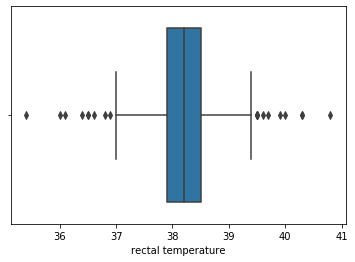

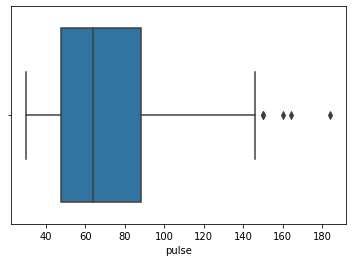

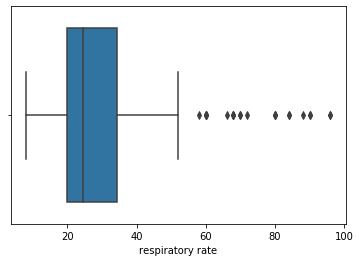

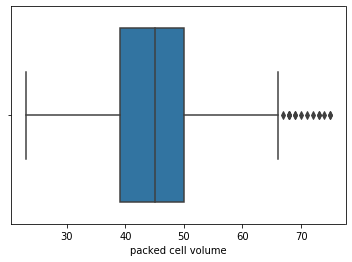

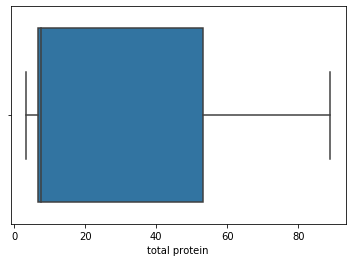

In [50]:
#Checking for outliers in the data 
for i in num_df.columns:
    sns.boxplot(num_df[i])
    plt.show()

In [47]:
#use IQR meth for outlier imputation
for i in num_df.columns:
    q1 = num_df[i].quantile(0.25)
    q3 = num_df[i].quantile(0.75) 
    iqr = q3-q1
    ll = q1 - 1.5*iqr
    ul = q3 + 1.5*iqr
    num_df[i] = num_df[i].replace(num_df[num_df[i]>ul][i],ul)
    num_df[i] = num_df[i].replace(num_df[num_df[i]<ll][i],ll)

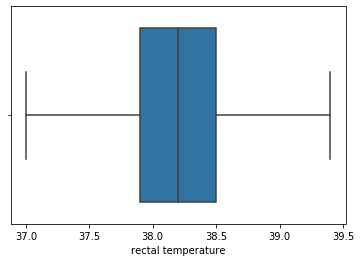

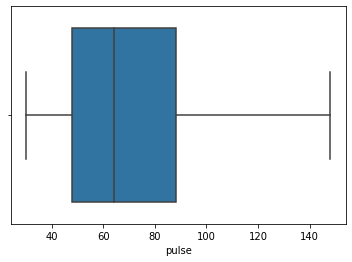

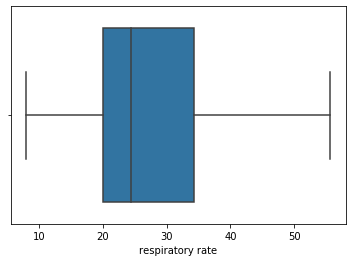

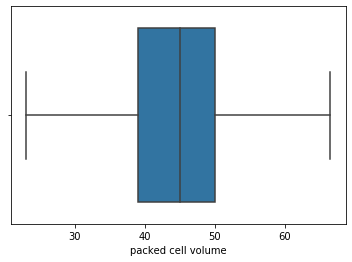

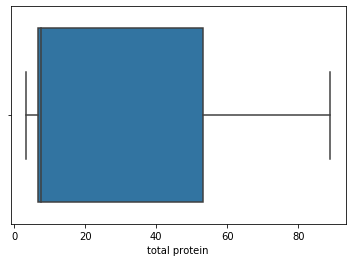

In [48]:
#rechecking for outliers in the data 
for i in num_df.columns:
    sns.boxplot(num_df[i])
    plt.show()

--------------------------------------------------------------------------------------------------------------------------------------------

# Data Visualisations

### Univariate analysis

In [53]:
#observe target variable outcome #3 levels#multi class classification algorithm
df['outcome'].value_counts()

1    178
2     77
3     44
Name: outcome, dtype: int64

In [54]:
np.round(df['outcome'].value_counts(normalize=True)*100,2)

1    59.53
2    25.75
3    14.72
Name: outcome, dtype: float64

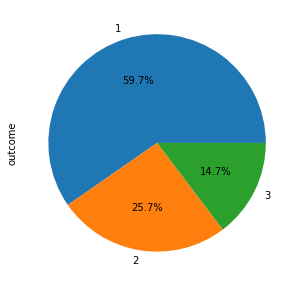

In [55]:
fig = plt.subplots(figsize=(15,5))
fig=y.value_counts().plot(kind='pie',labels=y.value_counts().index,autopct = '%1.1f%%')#,ax=axes[0])

plt.show()

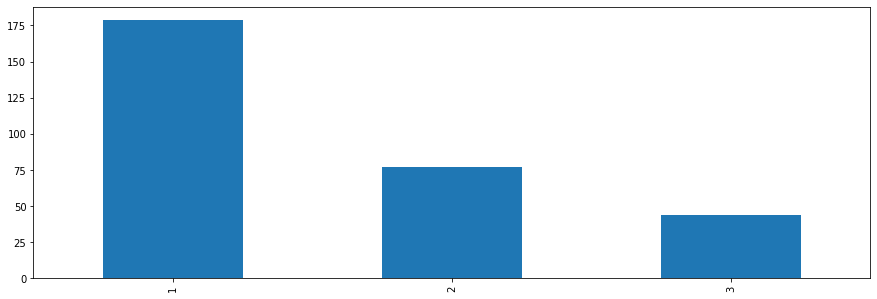

In [56]:
fig = plt.subplots(figsize=(15,5))
fig = y.value_counts().plot(kind='bar')
plt.show()


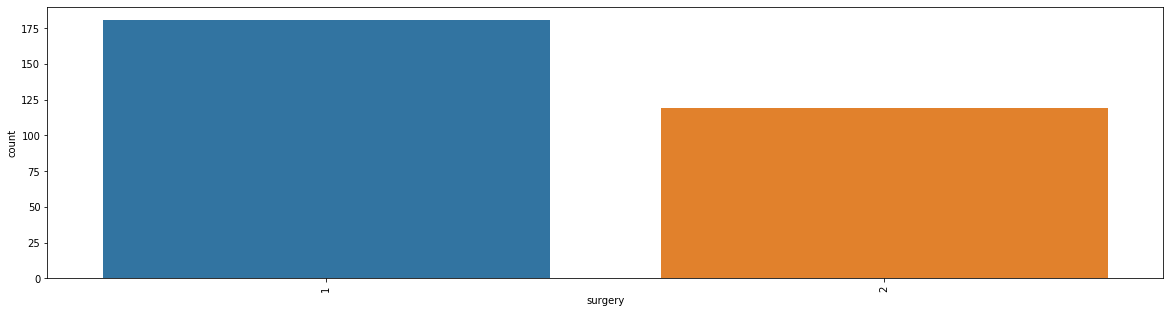

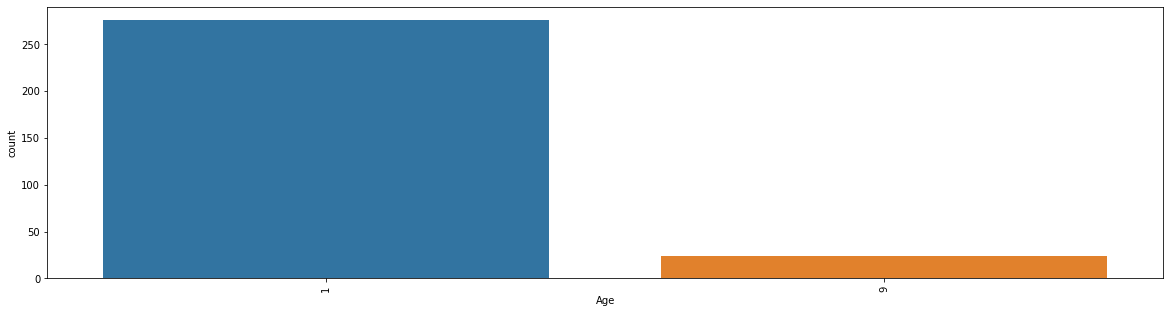

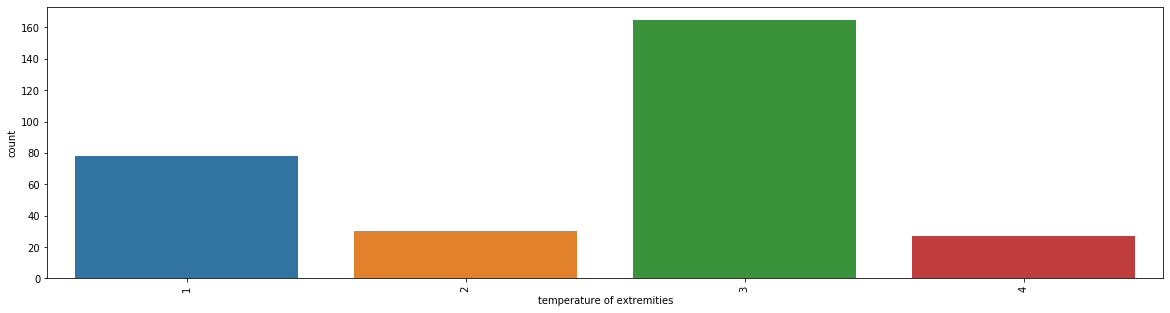

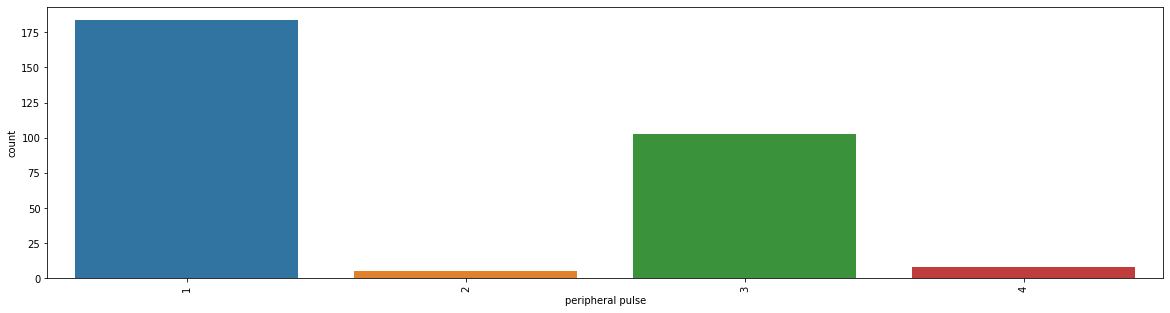

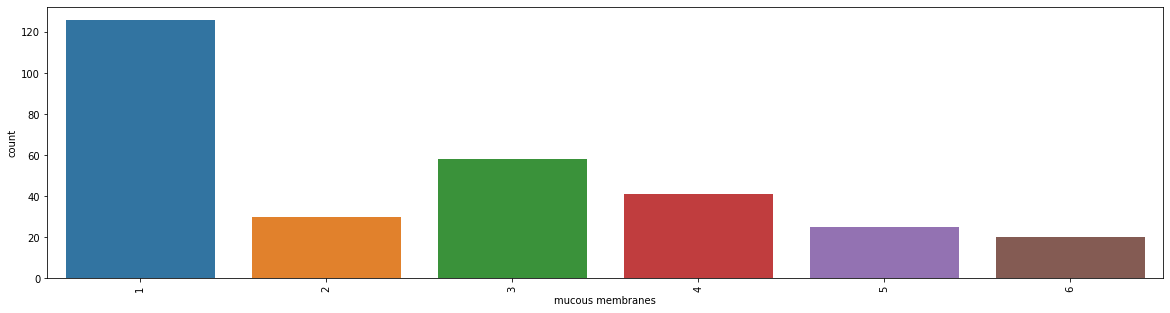

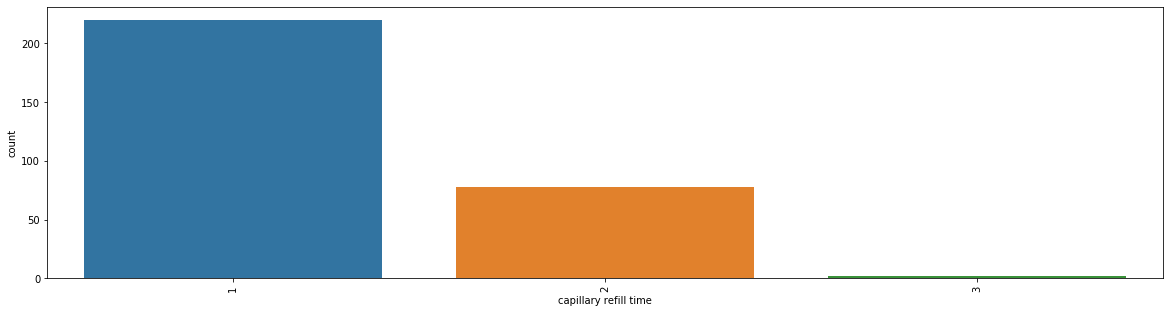

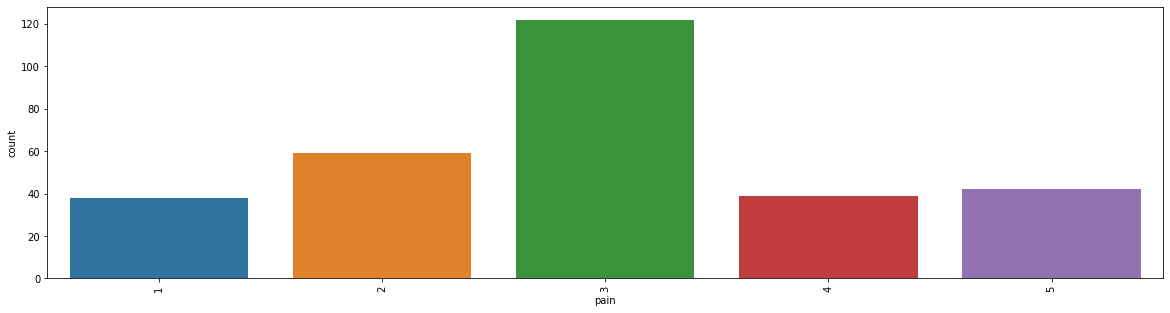

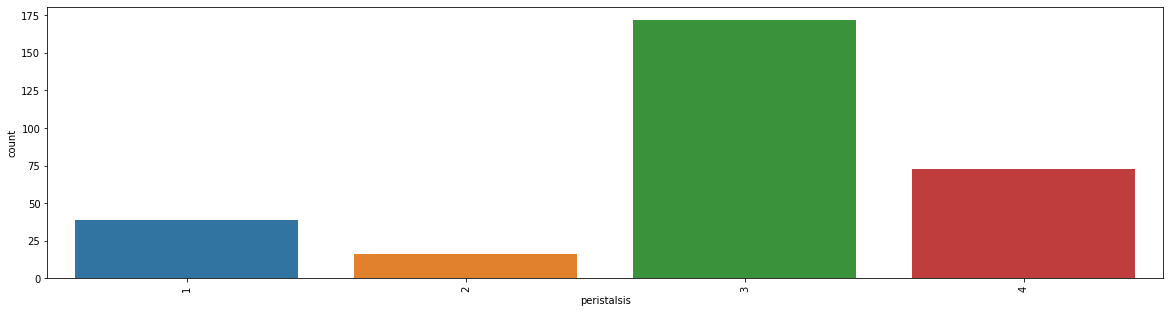

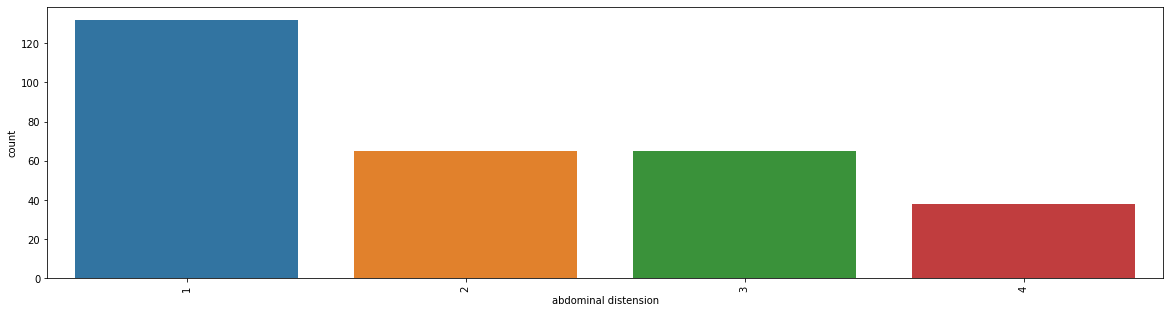

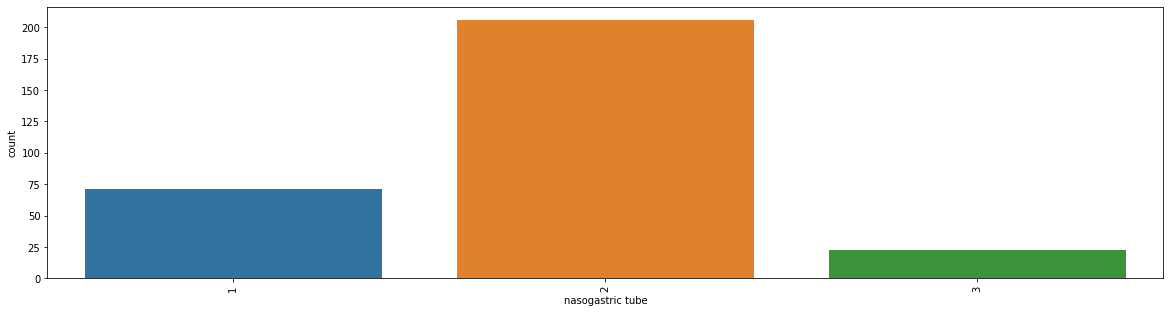

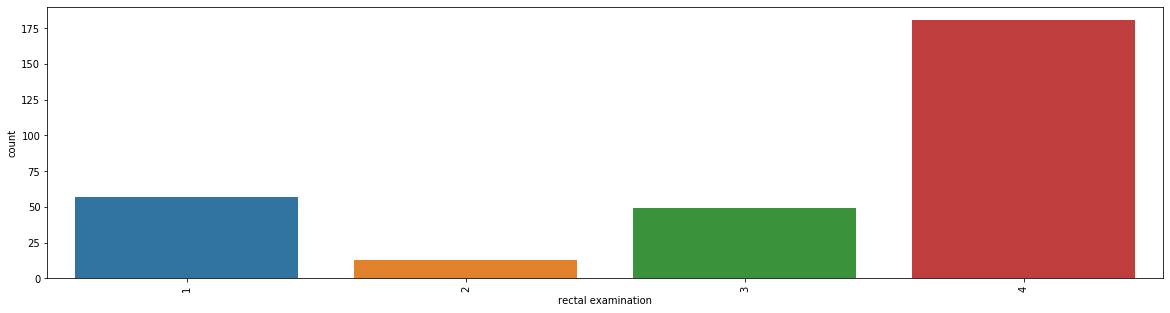

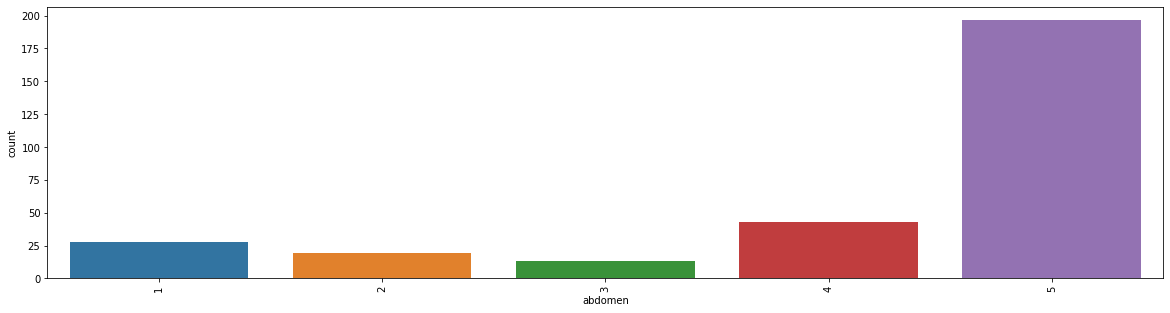

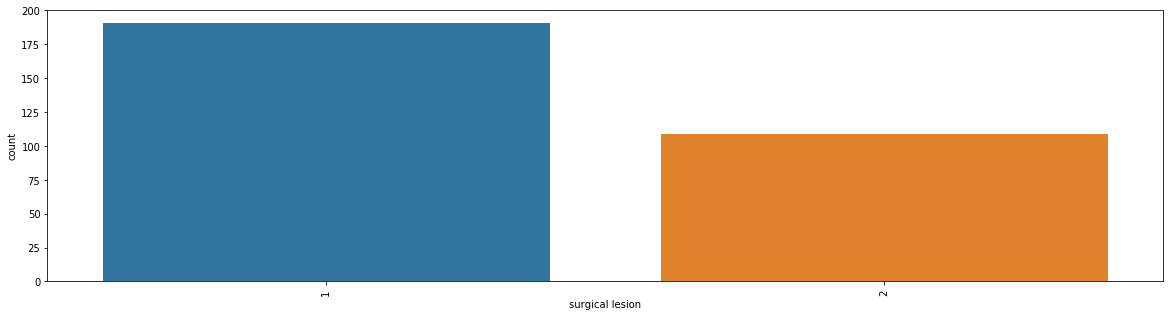

In [57]:
for i in obj_df.columns:
    plt.figure(figsize = (20,5))
    sns.countplot(obj_df[i])
    plt.xticks(rotation = 90)
    plt.show()

--------------------------------------------------------------------------------------------------------------------------------------------

## Distribution of numerical columns

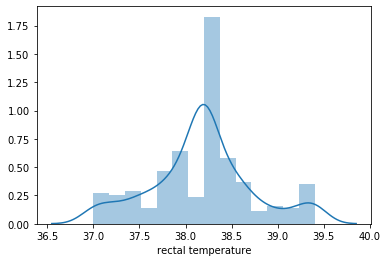

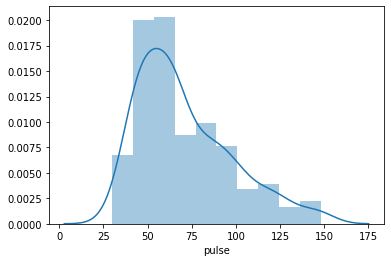

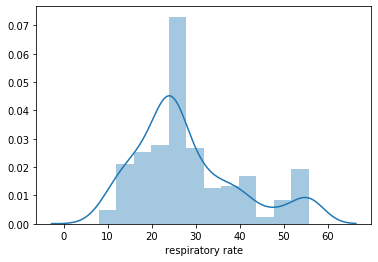

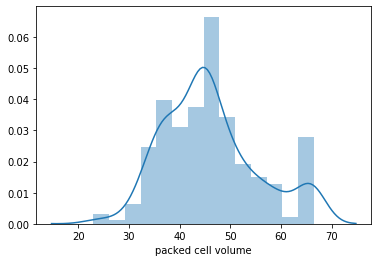

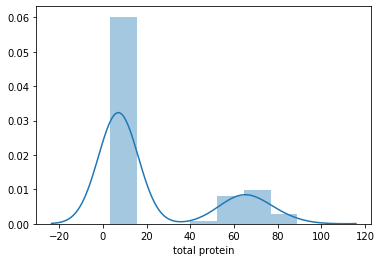

In [58]:
#analyzing numerical variable distribution
for i in num_df.columns:
    sns.distplot(num_df[i])#, hist = False)#, kde = True)
    plt.show()

### Bivaraiate analysis wrt target

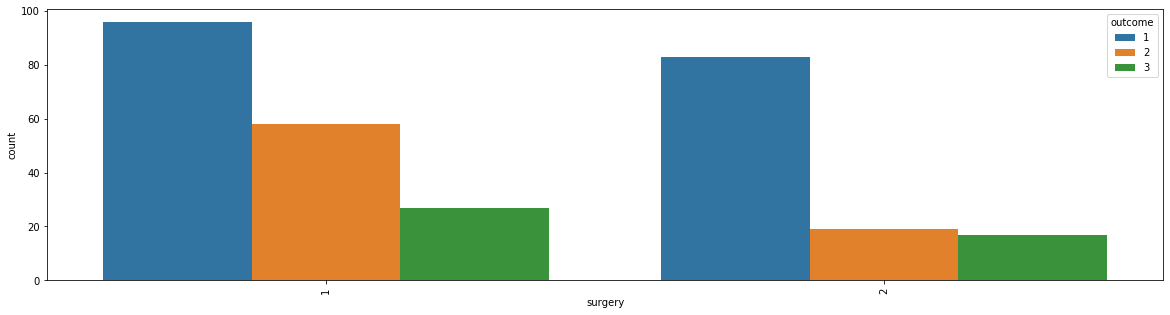

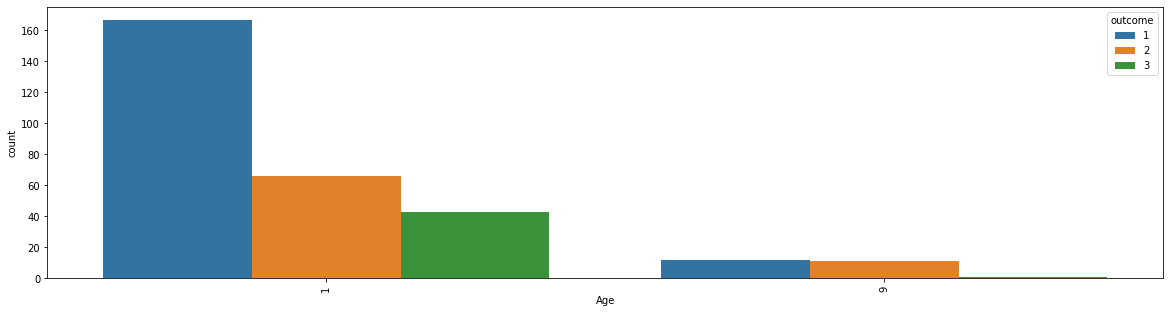

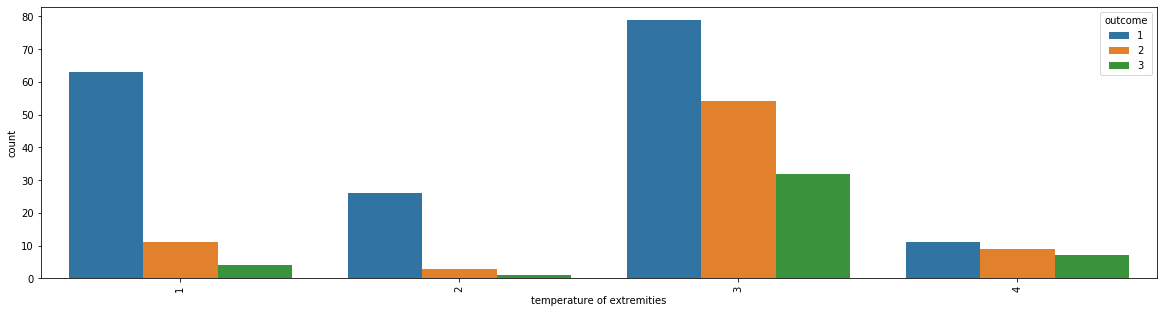

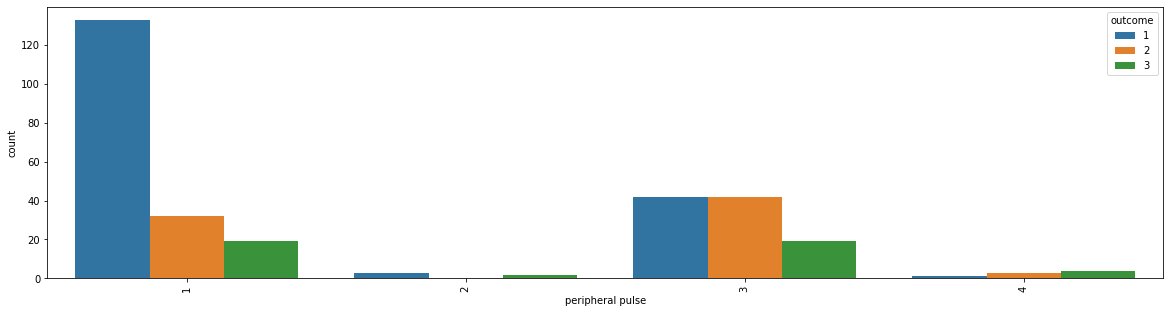

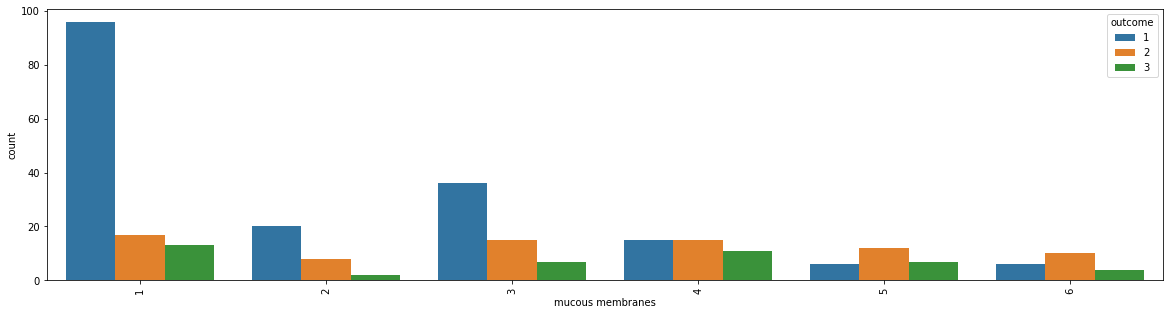

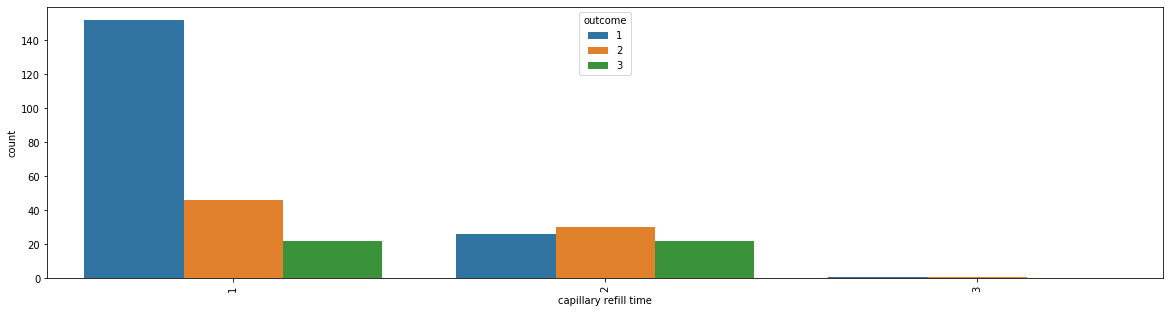

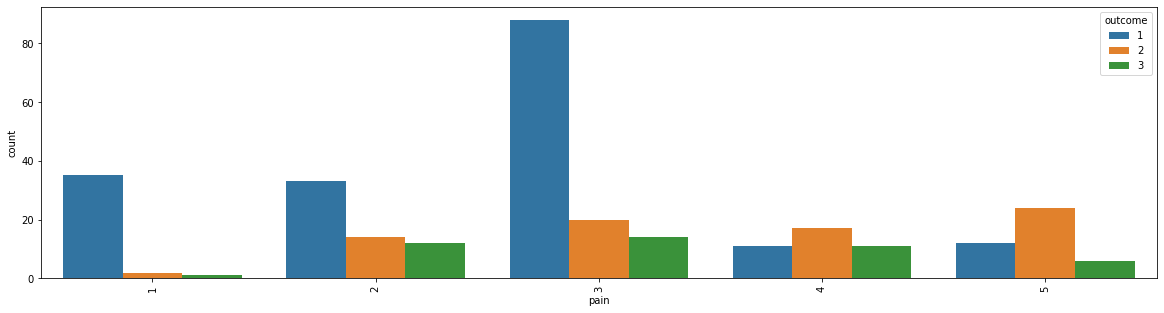

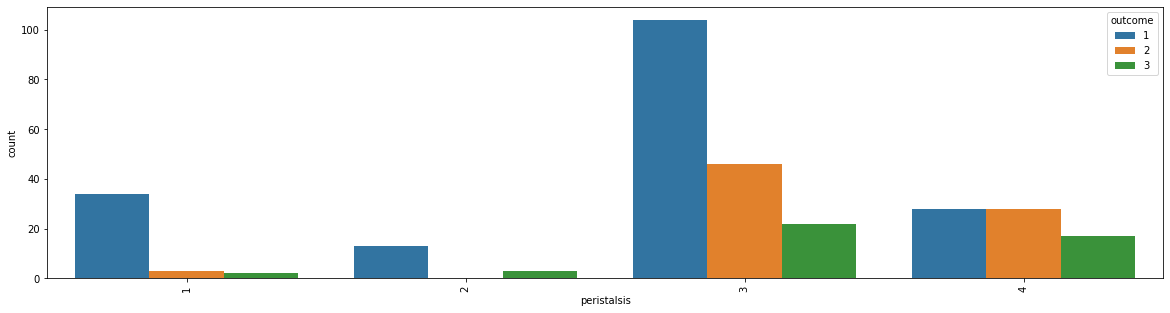

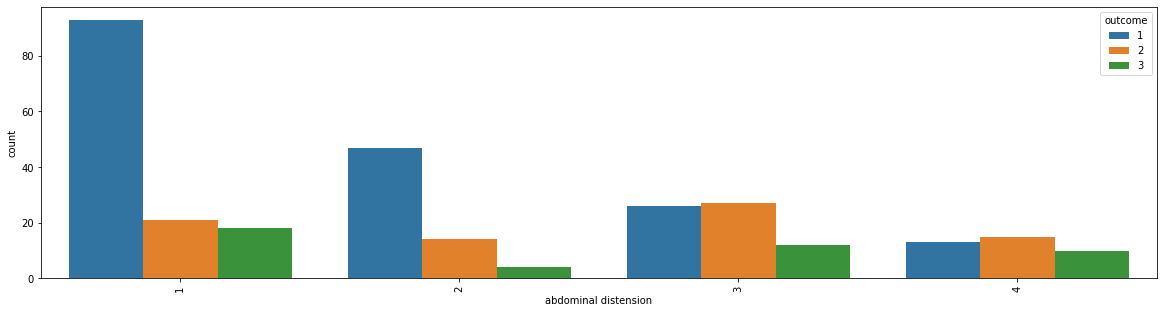

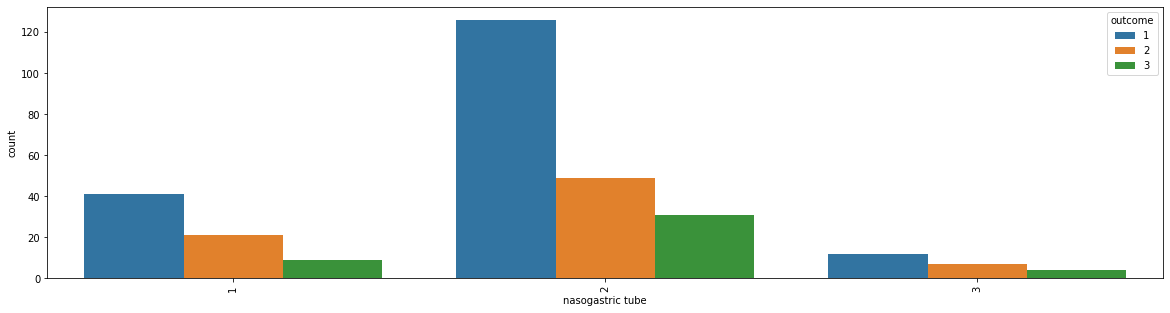

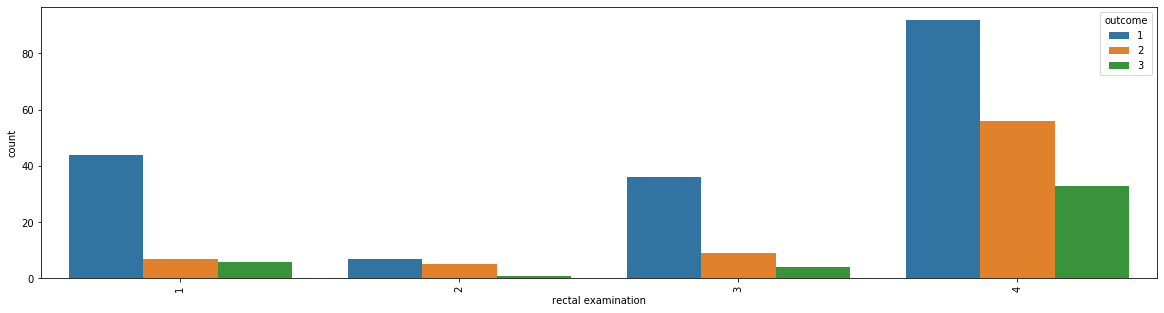

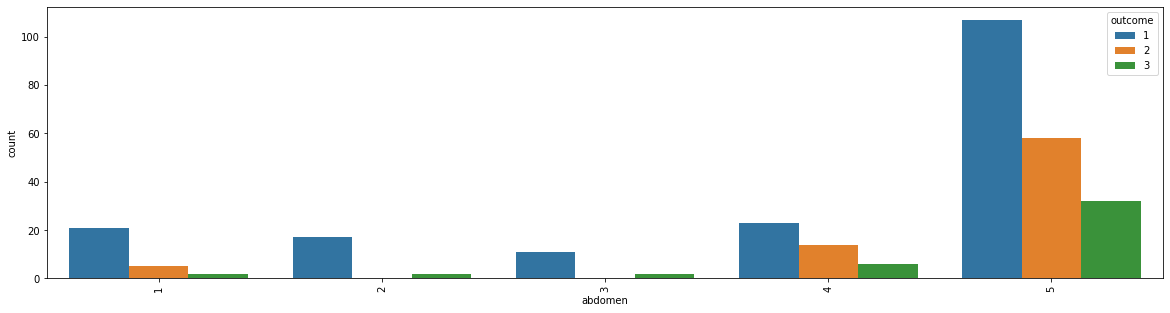

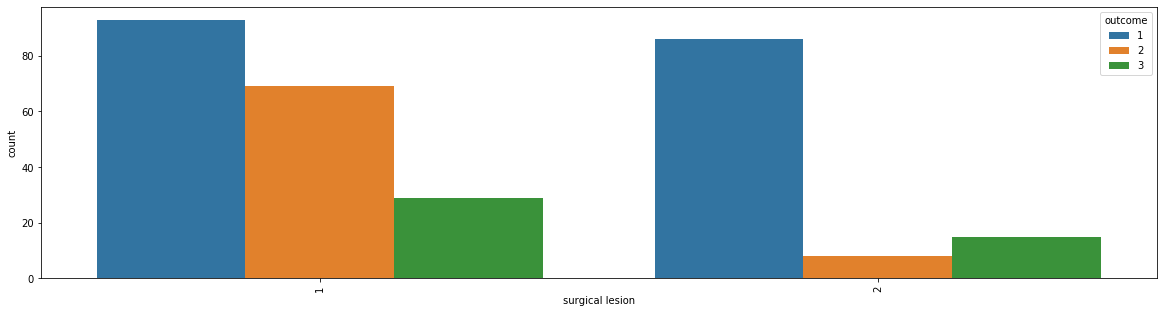

In [59]:
for i in obj_df.columns:
    plt.figure(figsize = (20,5))
    sns.countplot(obj_df[i], hue = y)
    plt.xticks(rotation = 90)
    plt.show()

## Target Variable Analysis

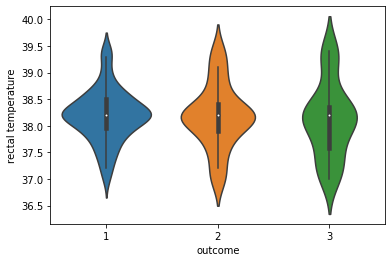

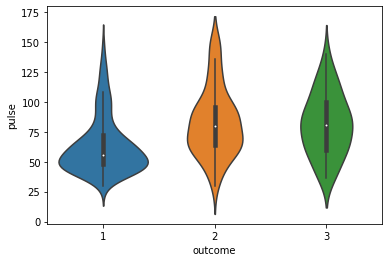

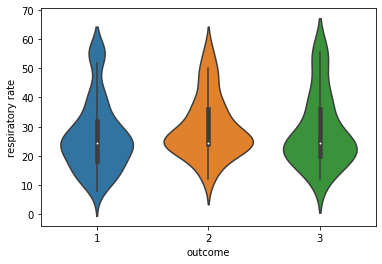

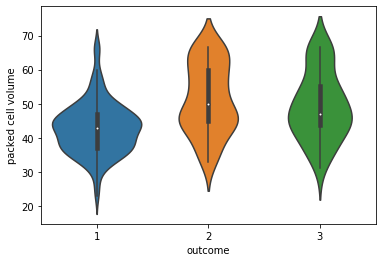

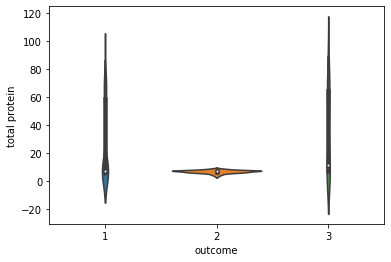

In [60]:
for i in num_df.columns:
    sns.violinplot(x=y, y=num_df[i])
    plt.show()

### Correlation Heatmap

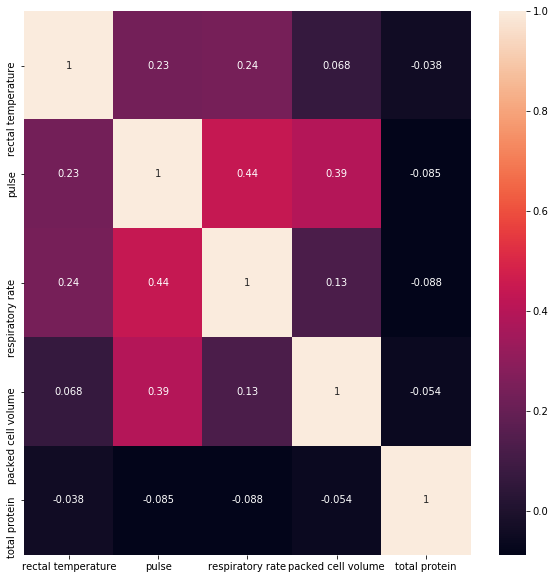

In [61]:
plt.figure(figsize = (10,10))
fe_corr = num_df.corr()
sns.heatmap(fe_corr, annot = True)
plt.show()

plt.figure(figsize = (20,20))
fe_corr = num_df.corr()
sns.heatmap(fe_corr[(fe_corr >= 0.50) | (fe_corr <= -0.50)], annot = True)
plt.show()

--------------------------------------------------------------------------------------------------------------------------------------------

## one hot Encoding of categorical variables

In [62]:
#dummy encoding categorical variables
dum_var=pd.get_dummies(obj_df)
dum_var.head(2)

,surgery_1,surgery_2,Age_1,Age_9,temperature of extremities_1,temperature of extremities_2,temperature of extremities_3,temperature of extremities_4,peripheral pulse_1,peripheral pulse_2,...,rectal examination_2,rectal examination_3,rectal examination_4,abdomen_1,abdomen_2,abdomen_3,abdomen_4,abdomen_5,surgical lesion_1,surgical lesion_2
0,0,1,1,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,1
1,1,0,1,0,0,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,1


In [63]:
print("original number of categorical columns ",obj_df.shape[1])
print("number of dummy encoded variables",dum_var.shape[1])

original number of categorical columns  13
number of dummy encoded variables 48


In [64]:
#check column names
dum_var.columns

Index(['surgery_1', 'surgery_2', 'Age_1', 'Age_9',
       'temperature of extremities_1', 'temperature of extremities_2',
       'temperature of extremities_3', 'temperature of extremities_4',
       'peripheral pulse_1', 'peripheral pulse_2', 'peripheral pulse_3',
       'peripheral pulse_4', 'mucous membranes_1', 'mucous membranes_2',
       'mucous membranes_3', 'mucous membranes_4', 'mucous membranes_5',
       'mucous membranes_6', 'capillary refill time_1',
       'capillary refill time_2', 'capillary refill time_3', 'pain_1',
       'pain_2', 'pain_3', 'pain_4', 'pain_5', 'peristalsis_1',
       'peristalsis_2', 'peristalsis_3', 'peristalsis_4',
       'abdominal distension_1', 'abdominal distension_2',
       'abdominal distension_3', 'abdominal distension_4',
       'nasogastric tube_1', 'nasogastric tube_2', 'nasogastric tube_3',
       'rectal examination_1', 'rectal examination_2', 'rectal examination_3',
       'rectal examination_4', 'abdomen_1', 'abdomen_2', 'abdomen_3',

In [ ]:
#since dummy encoding is adding too many coulmns for modelling, and this could badly affect tghe results, 
#we will proceed with the label encoded features

## Standardization....

In [49]:
#scaling numerical feats
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
num_scaled = std.fit_transform(num_df)
num_scaled = pd.DataFrame(num_scaled,columns=num_df.columns)

In [50]:
#check unscaled data
num_df.head(2)

,rectal temperature,pulse,respiratory rate,packed cell volume,total protein
0,38.5,66.0,28.0,45.0,8.4
1,39.2,88.0,20.0,50.0,85.0


In [51]:
#check scaled data, lies btw 0 n 1
num_scaled.head(2)

,rectal temperature,pulse,respiratory rate,packed cell volume,total protein
0,0.584340,-0.188918,0.011861,-0.102452,-0.537365
1,1.848103,0.633549,-0.661903,0.430229,2.363082


--------------------------------------------------------------------------------------------------------------------------------------------

### Dependent and Independent variables...

In [53]:
#dependent var # target  #obj_df['Outcome'] --> y
y=pd.DataFrame(y)
y.head()

,outcome
0,2
1,3
2,1
3,2
4,2


In [70]:
obj_df.shape,num_df.shape

((300, 13), (300, 5))

In [54]:
#independent var# feats# num and cat vars--> x
#concatenate scaled num vars and dummy vars into a x features df
x=pd.concat([num_scaled,obj_df],axis=1)
x.shape,y.shape

((300, 18), (300, 1))

In [72]:
x.columns

Index(['rectal temperature', 'pulse', 'respiratory rate', 'packed cell volume',
       'total protein', 'surgery', 'Age', 'temperature of extremities',
       'peripheral pulse', 'mucous membranes', 'capillary refill time', 'pain',
       'peristalsis', 'abdominal distension', 'nasogastric tube',
       'rectal examination', 'abdomen', 'surgical lesion'],
      dtype='object')

x=x.drop(['type of lesion 1', 'type of lesion 2',
       'type of lesion 3','nasogastric reflux'],axis=1)
x.shape

x=x.drop(['Age'],axis=1)
x.shape

--------------------------------------------------------------------------------------------------------------------------------------------

### Splitting data into train and test...

In [55]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.7,random_state=43)

In [74]:
print(x_train.shape ,x_test.shape,y_train.shape,y_test.shape)

(210, 18) (90, 18) (210, 1) (90, 1)


--------------------------------------------------------------------------------------------------------------------------------------------

# Supervised-multiclass Classification...
## Methods used
1. Logistic Regression
2. Decision Tree
3. Random Forest
4. SGD
5. SVM


## Logistic Regression Classification

In [75]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=43)
logreg.fit(x_train,y_train)

ypred_trn = logreg.predict(x_train)
ypred_tst = logreg.predict(x_test)

In [76]:
from sklearn.metrics import classification_report
print("logistic regression before feat selctn")
print("for train : \n")
print("Classification Report : \n",classification_report(y_train,ypred_trn))

print("for test : \n")
print("Classification Report : \n",classification_report(y_test,ypred_tst))


logistic regression before feat selctn
for train : 

Classification Report : 
               precision    recall  f1-score   support

           1       0.75      0.88      0.81       128
           2       0.65      0.60      0.63        50
           3       0.85      0.34      0.49        32

    accuracy                           0.73       210
   macro avg       0.75      0.61      0.64       210
weighted avg       0.74      0.73      0.72       210

for test : 

Classification Report : 
               precision    recall  f1-score   support

           1       0.68      0.84      0.75        51
           2       0.64      0.59      0.62        27
           3       0.00      0.00      0.00        12

    accuracy                           0.66        90
   macro avg       0.44      0.48      0.46        90
weighted avg       0.58      0.66      0.61        90



### LOGISTIC :- 66% Accurate before tuning

--------------------------------------------------------------------------------------------------------------------------------------------

--------------------------------------------------------------------------------------------------------------------------------------------

## Decision Tree Classification...

In [77]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=43)
dt.fit(x_train,y_train)

ypred_trn = dt.predict(x_train)

ypred_tst = dt.predict(x_test)


In [78]:
from sklearn.metrics import roc_auc_score,accuracy_score,classification_report
print("decision tree before feat selctn")
print("for train : \n")
print("Classification Report : \n",classification_report(y_train,ypred_trn))

print("for test : \n")
print("Classification Report : \n",classification_report(y_test,ypred_tst))


decision tree before feat selctn
for train : 

Classification Report : 
               precision    recall  f1-score   support

           1       1.00      1.00      1.00       128
           2       0.98      1.00      0.99        50
           3       1.00      0.97      0.98        32

    accuracy                           1.00       210
   macro avg       0.99      0.99      0.99       210
weighted avg       1.00      1.00      1.00       210

for test : 

Classification Report : 
               precision    recall  f1-score   support

           1       0.76      0.73      0.74        51
           2       0.42      0.41      0.42        27
           3       0.33      0.42      0.37        12

    accuracy                           0.59        90
   macro avg       0.50      0.52      0.51        90
weighted avg       0.60      0.59      0.59        90



In [79]:
print(f'Decision tree has {dt.tree_.node_count} nodes with maximum depth {dt.tree_.max_depth}.')

Decision tree has 105 nodes with maximum depth 12.


## DECISION TREE :- 59% Accurate before tuning

--------------------------------------------------------------------------------------------------------------------------------------------

--------------------------------------------------------------------------------------------------------------------------------------------

## Random Forest Classifier...

In [80]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=43)
rf.fit(x_train,y_train)

ypred_trn = rf.predict(x_train)


ypred_tst = rf.predict(x_test)


In [81]:
print("random forest before feat selctn")
print("for train : \n")
print("Classification Report : \n",classification_report(y_train,ypred_trn))

print("for test : \n")
print("Classification Report : \n",classification_report(y_test,ypred_tst))


random forest before feat selctn
for train : 

Classification Report : 
               precision    recall  f1-score   support

           1       1.00      1.00      1.00       128
           2       1.00      0.98      0.99        50
           3       0.97      1.00      0.98        32

    accuracy                           1.00       210
   macro avg       0.99      0.99      0.99       210
weighted avg       1.00      1.00      1.00       210

for test : 

Classification Report : 
               precision    recall  f1-score   support

           1       0.72      0.92      0.81        51
           2       0.65      0.56      0.60        27
           3       1.00      0.17      0.29        12

    accuracy                           0.71        90
   macro avg       0.79      0.55      0.57        90
weighted avg       0.74      0.71      0.68        90



In [82]:
n_nodes = []
max_depths = []

for ind_tree in rf.estimators_:
    n_nodes.append(ind_tree.tree_.node_count)
    max_depths.append(ind_tree.tree_.max_depth)
    
print(f'Average number of nodes {int(np.mean(n_nodes))}')
print(f'Average maximum depth {int(np.mean(max_depths))}')

Average number of nodes 102
Average maximum depth 12


## RANDOM FOREST :- 71% Accurate befoer tuning..

--------------------------------------------------------------------------------------------------------------------------------------------

--------------------------------------------------------------------------------------------------------------------------------------------

## SVM classification...

In [83]:
from sklearn.svm import SVC
svc = SVC(random_state=43)
svc.fit(x_train,y_train)

ypred_trn = svc.predict(x_train)

ypred_tst = svc.predict(x_test)


In [84]:
print("support vector machine before feat selctn")
print("for train : \n")
print("Classification Report : \n",classification_report(y_train,ypred_trn))

print("for test : \n")
print("Classification Report : \n",classification_report(y_test,ypred_tst))


support vector machine before feat selctn
for train : 

Classification Report : 
               precision    recall  f1-score   support

           1       0.70      0.96      0.81       128
           2       0.82      0.56      0.67        50
           3       0.00      0.00      0.00        32

    accuracy                           0.72       210
   macro avg       0.51      0.51      0.49       210
weighted avg       0.62      0.72      0.65       210

for test : 

Classification Report : 
               precision    recall  f1-score   support

           1       0.68      1.00      0.81        51
           2       0.80      0.44      0.57        27
           3       0.00      0.00      0.00        12

    accuracy                           0.70        90
   macro avg       0.49      0.48      0.46        90
weighted avg       0.63      0.70      0.63        90



## SVM :- 70% Accurate before tuning...

--------------------------------------------------------------------------------------------------------------------------------------------

--------------------------------------------------------------------------------------------------------------------------------------------

## SGD Classification...

In [85]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(random_state=43)
sgd.fit(x_train,y_train)

ypred_trn = sgd.predict(x_train)

ypred_tst = sgd.predict(x_test)


In [86]:
print("stochastic gradient before feat selctn")
print("for train : \n")
print("Classification Report : \n",classification_report(y_train,ypred_trn))

print("for test : \n")
print("Classification Report : \n",classification_report(y_test,ypred_tst))


stochastic gradient before feat selctn
for train : 

Classification Report : 
               precision    recall  f1-score   support

           1       0.71      0.92      0.80       128
           2       0.69      0.48      0.56        50
           3       0.78      0.22      0.34        32

    accuracy                           0.71       210
   macro avg       0.72      0.54      0.57       210
weighted avg       0.72      0.71      0.68       210

for test : 

Classification Report : 
               precision    recall  f1-score   support

           1       0.65      0.92      0.76        51
           2       0.61      0.41      0.49        27
           3       0.00      0.00      0.00        12

    accuracy                           0.64        90
   macro avg       0.42      0.44      0.42        90
weighted avg       0.55      0.64      0.58        90



## SGD :- 64% Accurate before tuning..

--------------------------------------------------------------------------------------------------------------------------------------------

--------------------------------------------------------------------------------------------------------------------------------------------

# Hypertuning using Gridsearhcv......

### Logistic Regression with gridsearch...

In [87]:
from sklearn.model_selection import GridSearchCV

param_dist = {'penalty': ['l1', 'l2', 'elasticnet', 'none'],'C': [0.1,1, 10, 100, 1000],'max_iter':[100,1000]} 
gs_logreg1 = GridSearchCV(LogisticRegression(random_state=43),param_grid=param_dist,refit=True)#,verbose=1)
gs_logreg1.fit(x_train,y_train)

ypred_trn = gs_logreg1.predict(x_train)


ypred_tst = gs_logreg1.predict(x_test)


In [88]:
gs_logreg1.best_params_

{'C': 1, 'max_iter': 100, 'penalty': 'l2'}

In [89]:
print("logistic regression after gridsearch")
print("for train : \n")

print("Classification Report : \n",classification_report(y_train,ypred_trn))

print("for test : \n")
print("Classification Report : \n",classification_report(y_test,ypred_tst))


logistic regression after gridsearch
for train : 

Classification Report : 
               precision    recall  f1-score   support

           1       0.75      0.88      0.81       128
           2       0.65      0.60      0.63        50
           3       0.85      0.34      0.49        32

    accuracy                           0.73       210
   macro avg       0.75      0.61      0.64       210
weighted avg       0.74      0.73      0.72       210

for test : 

Classification Report : 
               precision    recall  f1-score   support

           1       0.68      0.84      0.75        51
           2       0.64      0.59      0.62        27
           3       0.00      0.00      0.00        12

    accuracy                           0.66        90
   macro avg       0.44      0.48      0.46        90
weighted avg       0.58      0.66      0.61        90



### LOGISTIC :- 66% Accurate after tuning

--------------------------------------------------------------------------------------------------------------------------------------------

### Decision tree classification with Gridsearch

In [90]:
param_dist = {'criterion': ['gini','entropy'], 'splitter': ['best','random'],'max_depth':[None,1,2,3,4,5,6,7,8,9,10]}
gs_dt1 = GridSearchCV(DecisionTreeClassifier(random_state=43),param_grid=param_dist,refit=True,verbose=1)
gs_dt1.fit(x_train,y_train)

ypred_trn = gs_dt1.predict(x_train)

ypred_tst = gs_dt1.predict(x_test)


Fitting 5 folds for each of 44 candidates, totalling 220 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 220 out of 220 | elapsed:    1.3s finished


In [91]:
gs_dt1.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=43,
                       splitter='random')

In [92]:
print("decision tree after gridsearch")
print("for train : \n")
print("Classification Report : \n",classification_report(y_train,ypred_trn))

print("for test : \n")
print("Classification Report : \n",classification_report(y_test,ypred_tst))


decision tree after gridsearch
for train : 

Classification Report : 
               precision    recall  f1-score   support

           1       0.85      0.72      0.78       128
           2       0.51      0.80      0.62        50
           3       0.54      0.41      0.46        32

    accuracy                           0.69       210
   macro avg       0.64      0.64      0.62       210
weighted avg       0.72      0.69      0.69       210

for test : 

Classification Report : 
               precision    recall  f1-score   support

           1       0.72      0.71      0.71        51
           2       0.56      0.67      0.61        27
           3       0.25      0.17      0.20        12

    accuracy                           0.62        90
   macro avg       0.51      0.51      0.51        90
weighted avg       0.61      0.62      0.61        90



### DECISION TREE :- 62% Accurate after tuning

--------------------------------------------------------------------------------------------------------------------------------------------

### Random Forest classification with GridsearchTuning...

In [93]:
param_dist = {'n_estimators': [100,1000],'criterion':['gini','entropy'],'max_depth':[None,1,2,3,4,5]}
gs_rf1 = GridSearchCV(RandomForestClassifier(random_state=43),param_grid=param_dist,refit=True,verbose=1)
gs_rf1.fit(x_train,y_train)

ypred_trn = gs_rf1.predict(x_train)

ypred_tst = gs_rf1.predict(x_test)


Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:  1.6min finished


In [94]:
gs_rf1.best_estimator_

RandomForestClassifier(random_state=43)

In [95]:
print("random forest after gridsearch")
print("for train : \n")
print("Classification Report : \n",classification_report(y_train,ypred_trn))

print("for test : \n")
print("Classification Report : \n",classification_report(y_test,ypred_tst))


random forest after gridsearch
for train : 

Classification Report : 
               precision    recall  f1-score   support

           1       1.00      1.00      1.00       128
           2       1.00      0.98      0.99        50
           3       0.97      1.00      0.98        32

    accuracy                           1.00       210
   macro avg       0.99      0.99      0.99       210
weighted avg       1.00      1.00      1.00       210

for test : 

Classification Report : 
               precision    recall  f1-score   support

           1       0.72      0.92      0.81        51
           2       0.65      0.56      0.60        27
           3       1.00      0.17      0.29        12

    accuracy                           0.71        90
   macro avg       0.79      0.55      0.57        90
weighted avg       0.74      0.71      0.68        90



### RANDOM FOREST :- 71% Accurate after tuning

--------------------------------------------------------------------------------------------------------------------------------------------

--------------------------------------------------------------------------------------------------------------------------------------------

### SVM with gridsearchTuning

In [96]:
param_dist = {'C': [0.1,1], 'gamma': [0.1,0.01,0.0001], 'kernel': ['linear']} 
gs_svc1 = GridSearchCV(SVC(random_state=43),param_grid=param_dist,refit=True,verbose=5)
gs_svc1.fit(x_train,y_train)

ypred_trn = gs_svc1.predict(x_train)

ypred_tst = gs_svc1.predict(x_test)
gs_svc1.best_estimator_

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] C=0.1, gamma=0.1, kernel=linear .................................
[CV] ..... C=0.1, gamma=0.1, kernel=linear, score=0.643, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=linear .................................
[CV] ..... C=0.1, gamma=0.1, kernel=linear, score=0.619, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=linear .................................
[CV] ..... C=0.1, gamma=0.1, kernel=linear, score=0.738, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=linear .................................
[CV] ..... C=0.1, gamma=0.1, kernel=linear, score=0.643, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=linear .................................
[CV] ..... C=0.1, gamma=0.1, kernel=linear, score=0.667, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=linear ................................
[CV] .... C=0.1, gamma=0.01, kernel=linear, score=0.643, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=linear ................................
[CV] .... C=0.1, 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


[CV] .. C=0.1, gamma=0.0001, kernel=linear, score=0.738, total=   0.0s
[CV] C=0.1, gamma=0.0001, kernel=linear ..............................
[CV] .. C=0.1, gamma=0.0001, kernel=linear, score=0.643, total=   0.0s
[CV] C=0.1, gamma=0.0001, kernel=linear ..............................
[CV] .. C=0.1, gamma=0.0001, kernel=linear, score=0.667, total=   0.0s
[CV] C=1, gamma=0.1, kernel=linear ...................................
[CV] ....... C=1, gamma=0.1, kernel=linear, score=0.595, total=   0.0s
[CV] C=1, gamma=0.1, kernel=linear ...................................
[CV] ....... C=1, gamma=0.1, kernel=linear, score=0.643, total=   0.0s
[CV] C=1, gamma=0.1, kernel=linear ...................................
[CV] ....... C=1, gamma=0.1, kernel=linear, score=0.714, total=   0.0s
[CV] C=1, gamma=0.1, kernel=linear ...................................
[CV] ....... C=1, gamma=0.1, kernel=linear, score=0.690, total=   0.0s
[CV] C=1, gamma=0.1, kernel=linear ...................................
[CV] .

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.4s finished


SVC(C=1, gamma=0.1, kernel='linear', random_state=43)

In [97]:
gs_svc1.best_estimator_

SVC(C=1, gamma=0.1, kernel='linear', random_state=43)

In [98]:
print("support vector machine after gridsearch")
print("for train : \n")
print("Classification Report : \n",classification_report(y_train,ypred_trn))

print("for test : \n")
print("Classification Report : \n",classification_report(y_test,ypred_tst))


support vector machine after gridsearch
for train : 

Classification Report : 
               precision    recall  f1-score   support

           1       0.77      0.90      0.83       128
           2       0.72      0.66      0.69        50
           3       0.86      0.38      0.52        32

    accuracy                           0.76       210
   macro avg       0.78      0.64      0.68       210
weighted avg       0.77      0.76      0.75       210

for test : 

Classification Report : 
               precision    recall  f1-score   support

           1       0.70      0.86      0.77        51
           2       0.64      0.59      0.62        27
           3       1.00      0.17      0.29        12

    accuracy                           0.69        90
   macro avg       0.78      0.54      0.56        90
weighted avg       0.72      0.69      0.66        90



### SVM :- 69% Accurate after tuning

--------------------------------------------------------------------------------------------------------------------------------------------

### SGD classifier after gridsearchTuning..

In [99]:
param_dist = {'loss':['hinge','log','modified_huber'],'penalty':['l2','l1','elasticnet'],'random_state':[43]}
gs_sgd1 = GridSearchCV(SGDClassifier(random_state=43),param_dist,refit=True,verbose=5)
gs_sgd1.fit(x_train,y_train)

ypred_trn = gs_sgd1.predict(x_train)

ypred_tst = gs_sgd1.predict(x_test)
gs_sgd1.best_estimator_

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] loss=hinge, penalty=l2, random_state=43 .........................
[CV]  loss=hinge, penalty=l2, random_state=43, score=0.643, total=   0.0s
[CV] loss=hinge, penalty=l2, random_state=43 .........................
[CV]  loss=hinge, penalty=l2, random_state=43, score=0.619, total=   0.0s
[CV] loss=hinge, penalty=l2, random_state=43 .........................
[CV]  loss=hinge, penalty=l2, random_state=43, score=0.619, total=   0.0s
[CV] loss=hinge, penalty=l2, random_state=43 .........................
[CV]  loss=hinge, penalty=l2, random_state=43, score=0.619, total=   0.0s
[CV] loss=hinge, penalty=l2, random_state=43 .........................
[CV]  loss=hinge, penalty=l2, random_state=43, score=0.595, total=   0.0s
[CV] loss=hinge, penalty=l1, random_state=43 .........................
[CV]  loss=hinge, penalty=l1, random_state=43, score=0.595, total=   0.0s
[CV] loss=hinge, penalty=l1, random_state=43 .........................

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


[CV]  loss=hinge, penalty=l1, random_state=43, score=0.714, total=   0.0s
[CV] loss=hinge, penalty=elasticnet, random_state=43 .................
[CV]  loss=hinge, penalty=elasticnet, random_state=43, score=0.619, total=   0.0s
[CV] loss=hinge, penalty=elasticnet, random_state=43 .................
[CV]  loss=hinge, penalty=elasticnet, random_state=43, score=0.643, total=   0.0s
[CV] loss=hinge, penalty=elasticnet, random_state=43 .................
[CV]  loss=hinge, penalty=elasticnet, random_state=43, score=0.524, total=   0.0s
[CV] loss=hinge, penalty=elasticnet, random_state=43 .................
[CV]  loss=hinge, penalty=elasticnet, random_state=43, score=0.571, total=   0.0s
[CV] loss=hinge, penalty=elasticnet, random_state=43 .................
[CV]  loss=hinge, penalty=elasticnet, random_state=43, score=0.643, total=   0.0s
[CV] loss=log, penalty=l2, random_state=43 ...........................
[CV]  loss=log, penalty=l2, random_state=43, score=0.595, total=   0.0s
[CV] loss=log, pen

[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    0.6s finished


SGDClassifier(penalty='l1', random_state=43)

In [100]:
gs_sgd1.best_estimator_

SGDClassifier(penalty='l1', random_state=43)

In [101]:
print("stochastic gradient descent classifier after gridsearch")
print("for train : \n")

print("Classification Report : \n",classification_report(y_train,ypred_trn))

print("for test : \n")
print("Classification Report : \n",classification_report(y_test,ypred_tst))


stochastic gradient descent classifier after gridsearch
for train : 

Classification Report : 
               precision    recall  f1-score   support

           1       0.86      0.74      0.79       128
           2       0.62      0.86      0.72        50
           3       0.53      0.50      0.52        32

    accuracy                           0.73       210
   macro avg       0.67      0.70      0.68       210
weighted avg       0.75      0.73      0.74       210

for test : 

Classification Report : 
               precision    recall  f1-score   support

           1       0.79      0.75      0.77        51
           2       0.64      0.85      0.73        27
           3       0.50      0.25      0.33        12

    accuracy                           0.71        90
   macro avg       0.64      0.62      0.61        90
weighted avg       0.71      0.71      0.70        90



### SGD :- 71% Accurate after tuning

In [56]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier


from sklearn.metrics import accuracy_score,classification_report

--------------------------------------------------------------------------------------------------------------------------------------------

# Feature Selection...

In [57]:
from sklearn.feature_selection import RFECV

### Feature_Selection on Logistic regression model

In [59]:
from sklearn.feature_selection import RFECV
#fitting model for rfe using logreg
logreg = LogisticRegression(random_state=43)
rfe_lr = RFECV(estimator = logreg)
rfe_lr = rfe_lr.fit(x_train,y_train)

In [60]:
#ranking feats
rfe_lr.ranking_

array([1, 1, 3, 1, 1, 1, 2, 1, 8, 6, 1, 1, 4, 5, 1, 1, 7, 1])

In [61]:
#making a df for studying ranks for each model
rank =pd.DataFrame()
rank['Features'] = x_train.columns
rank['Rank_lr'] = rfe_lr.ranking_
rank

,Features,Rank_lr
0,rectal temperature,1
1,pulse,1
2,respiratory rate,3
3,packed cell volume,1
4,total protein,1
5,surgery,1
6,Age,2
7,temperature of extremities,1
8,peripheral pulse,8
9,mucous membranes,6


### Features with a rank of 1 are to be considered....

In [62]:
# rfe selected feats for logreg
feat_lr_rfe = rank[rank['Rank_lr']==1]['Features']
feat_lr_rfe

0             rectal temperature
1                          pulse
3             packed cell volume
4                  total protein
5                        surgery
7     temperature of extremities
10         capillary refill time
11                          pain
14              nasogastric tube
15            rectal examination
17               surgical lesion
Name: Features, dtype: object

In [63]:
#verifying rfe feat selctn
print("no of xtrain feats : ",x_train.shape[1])
print("no of selected xtrain feats after rfe for logreg : ",
      x_train[feat_lr_rfe].shape[1])

no of xtrain feats :  18
no of selected xtrain feats after rfe for logreg :  11


In [64]:
#building model on rfe selected feats for logreg
logreg_rfe = LogisticRegression(random_state=43,solver='liblinear')
logreg_rfe.fit(x_train[feat_lr_rfe],y_train)

ypred_trn = logreg_rfe.predict(x_train[feat_lr_rfe])

ypred_tst = logreg_rfe.predict(x_test[feat_lr_rfe])

In [65]:
#check classfctn report
print("logistic regression aftre rfe feat selctn")
print("for train : \n")
print("Classification Report : \n",classification_report(y_train,ypred_trn))

print("for test : \n")
print("Classification Report : \n",classification_report(y_test,ypred_tst))


logistic regression aftre rfe feat selctn
for train : 

Classification Report : 
               precision    recall  f1-score   support

           1       0.75      0.89      0.81       128
           2       0.70      0.64      0.67        50
           3       0.75      0.28      0.41        32

    accuracy                           0.74       210
   macro avg       0.73      0.60      0.63       210
weighted avg       0.74      0.74      0.72       210

for test : 

Classification Report : 
               precision    recall  f1-score   support

           1       0.66      0.88      0.76        51
           2       0.62      0.48      0.54        27
           3       0.00      0.00      0.00        12

    accuracy                           0.64        90
   macro avg       0.43      0.45      0.43        90
weighted avg       0.56      0.64      0.59        90



## LOGISTIC :- 64% accuracy after feature selection

--------------------------------------------------------------------------------------------------------------------------------------------

--------------------------------------------------------------------------------------------------------------------------------------------

### Featuer_Selection on Decision Tree model

In [66]:
#fitting model for rfe using dtree
dt = DecisionTreeClassifier(random_state=43)
rfe_dt = RFECV(estimator = dt)
rfe_dt = rfe_dt.fit(x_train,y_train)
rfe_dt.ranking_

array([1, 1, 1, 1, 1, 2, 7, 1, 9, 1, 4, 5, 8, 1, 1, 1, 6, 3])

In [67]:
##making a df for studying ranks for each model
rank['Rank_dt'] = rfe_dt.ranking_
feat_dt_rfe = rank[rank['Rank_dt']==1]['Features']
feat_dt_rfe.head(10)

0             rectal temperature
1                          pulse
2               respiratory rate
3             packed cell volume
4                  total protein
7     temperature of extremities
9               mucous membranes
13          abdominal distension
14              nasogastric tube
15            rectal examination
Name: Features, dtype: object

In [68]:
#verifying rfe feat selctn
print("no of xtrain feats : ",x_train.shape[1])
print("no of selected xtrain feats after rfe for decsn tree : ",x_train[feat_dt_rfe].shape[1])

no of xtrain feats :  18
no of selected xtrain feats after rfe for decsn tree :  10


In [69]:
#building model on rfe selected feats for dtree

dt_rfe = DecisionTreeClassifier(random_state=43)
dt_rfe.fit(x_train[feat_dt_rfe],y_train)

ypred_trn = dt_rfe.predict(x_train[feat_dt_rfe])

ypred_tst = dt_rfe.predict(x_test[feat_dt_rfe])


In [70]:
#check classification report
print("decision tree after feat selctn")
print("for train : \n")
print("Classification Report : \n",classification_report(y_train,ypred_trn))

print("for test : \n")
print("Classification Report : \n",classification_report(y_test,ypred_tst))


decision tree after feat selctn
for train : 

Classification Report : 
               precision    recall  f1-score   support

           1       0.99      1.00      1.00       128
           2       0.98      0.98      0.98        50
           3       1.00      0.97      0.98        32

    accuracy                           0.99       210
   macro avg       0.99      0.98      0.99       210
weighted avg       0.99      0.99      0.99       210

for test : 

Classification Report : 
               precision    recall  f1-score   support

           1       0.66      0.65      0.65        51
           2       0.37      0.41      0.39        27
           3       0.30      0.25      0.27        12

    accuracy                           0.52        90
   macro avg       0.44      0.43      0.44        90
weighted avg       0.52      0.52      0.52        90



## DECISION TREE :- 52% accuracy after feature selection

--------------------------------------------------------------------------------------------------------------------------------------------

--------------------------------------------------------------------------------------------------------------------------------------------

### Featuer_Selection on Random Forest model

In [71]:
#fitting model for rfe using random forest
rf=RandomForestClassifier(random_state=43)
rfe_rf = RFECV(estimator = rf)
rfe_rf = rfe_rf.fit(x_train,y_train)
rfe_rf.ranking_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [72]:
#making a df for studying ranks for each model
rank['Rank_rf'] = rfe_rf.ranking_
feat_rf_rfe = rank[rank['Rank_rf']==1]['Features']
feat_rf_rfe.head(10)

0            rectal temperature
1                         pulse
2              respiratory rate
3            packed cell volume
4                 total protein
5                       surgery
6                           Age
7    temperature of extremities
8              peripheral pulse
9              mucous membranes
Name: Features, dtype: object

In [73]:
#verifying rfe feat selctn
print("no of xtrain feats : ",x_train.shape[1])
print("no of selected xtrain feats after rfe for rand forest : ",x_train[feat_rf_rfe].shape[1])

no of xtrain feats :  18
no of selected xtrain feats after rfe for rand forest :  18


In [74]:
#building model on rfe selected feats for random forest

rf_rfe = RandomForestClassifier(random_state=43)
rf_rfe.fit(x_train[feat_rf_rfe],y_train)

ypred_trn = rf_rfe.predict(x_train[feat_rf_rfe])

ypred_tst = rf_rfe.predict(x_test[feat_rf_rfe])


In [75]:
#check classfctn report
print("random forest after feat selctn")
print("for train : \n")
print("Classification Report : \n",classification_report(y_train,ypred_trn))

print("for test : \n")
print("Classification Report : \n",classification_report(y_test,ypred_tst))


random forest after feat selctn
for train : 

Classification Report : 
               precision    recall  f1-score   support

           1       1.00      1.00      1.00       128
           2       1.00      0.98      0.99        50
           3       0.97      1.00      0.98        32

    accuracy                           1.00       210
   macro avg       0.99      0.99      0.99       210
weighted avg       1.00      1.00      1.00       210

for test : 

Classification Report : 
               precision    recall  f1-score   support

           1       0.72      0.92      0.81        51
           2       0.65      0.56      0.60        27
           3       1.00      0.17      0.29        12

    accuracy                           0.71        90
   macro avg       0.79      0.55      0.57        90
weighted avg       0.74      0.71      0.68        90



## RANDOM FOREST :- 71% accuracy after feature selection

--------------------------------------------------------------------------------------------------------------------------------------------

--------------------------------------------------------------------------------------------------------------------------------------------

### Featuer_Selection on SVM model

In [76]:
#fitting model for rfe using svm
svc = SVC(kernel='linear',random_state=43)
rfe_svc = RFECV(estimator = svc)#, step=1, cv=5)
rfe_svc = rfe_svc.fit(x_train,y_train)
rfe_svc.ranking_
#estimator = SVC(kernel="linear")
#selector = RFECV(estimator, step=1, cv=5)
#selector = selector.fit(X, y)

array([1, 1, 1, 1, 1, 1, 2, 1, 3, 5, 1, 1, 4, 1, 1, 1, 6, 1])

In [77]:
#making a df for studying ranks for each model
rank['Rank_svc'] = rfe_svc.ranking_
feat_svc_rfe = rank[rank['Rank_svc']==1]['Features']
feat_svc_rfe.head(10)

0             rectal temperature
1                          pulse
2               respiratory rate
3             packed cell volume
4                  total protein
5                        surgery
7     temperature of extremities
10         capillary refill time
11                          pain
13          abdominal distension
Name: Features, dtype: object

In [78]:
#verifying rfe feat selctn
print("no of xtrain feats : ",x_train.shape[1])
print("no of selected xtrain feats after rfe for svm : ",x_train[feat_svc_rfe].shape[1])

no of xtrain feats :  18
no of selected xtrain feats after rfe for svm :  13


In [79]:
#building model on rfe selected feats for svc

from sklearn.svm import SVC
svc_rfe = SVC(random_state=43)
svc_rfe.fit(x_train[feat_svc_rfe],y_train)

ypred_trn = svc_rfe.predict(x_train[feat_svc_rfe])

ypred_tst = svc_rfe.predict(x_test[feat_svc_rfe])


In [80]:
#check classfctn report
print("support vector machine after rfe feat selctn")
print("for train : \n")
print("Classification Report : \n",classification_report(y_train,ypred_trn))

print("for test : \n")
print("Classification Report : \n",classification_report(y_test,ypred_tst))


support vector machine after rfe feat selctn
for train : 

Classification Report : 
               precision    recall  f1-score   support

           1       0.71      0.93      0.81       128
           2       0.71      0.58      0.64        50
           3       1.00      0.06      0.12        32

    accuracy                           0.71       210
   macro avg       0.81      0.52      0.52       210
weighted avg       0.76      0.71      0.66       210

for test : 

Classification Report : 
               precision    recall  f1-score   support

           1       0.66      0.94      0.77        51
           2       0.71      0.44      0.55        27
           3       0.00      0.00      0.00        12

    accuracy                           0.67        90
   macro avg       0.45      0.46      0.44        90
weighted avg       0.58      0.67      0.60        90



## SVM :- 67% accuracy after feature selection

--------------------------------------------------------------------------------------------------------------------------------------------

--------------------------------------------------------------------------------------------------------------------------------------------

### Featuer_Selection on SGD model

In [93]:
#fitting model for rfe using sgd
sgd = SGDClassifier(random_state=43)
rfe_sgd = RFECV(estimator = sgd)#, step=1, cv=5)
rfe_sgd = rfe_sgd.fit(x_train,y_train)
rfe_sgd.ranking_
#estimator = SVC(kernel="linear")
#selector = RFECV(estimator, step=1, cv=5)
#selector = selector.fit(X, y)

array([1, 1, 2, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [94]:
#making a df for studying ranks for each model
rank['Rank_sgd'] = rfe_sgd.ranking_
feat_sgd_rfe = rank[rank['Rank_sgd']==1]['Features']
feat_sgd_rfe.head

<bound method NDFrame.head of 0             rectal temperature
1                          pulse
3             packed cell volume
4                  total protein
5                        surgery
6                            Age
7     temperature of extremities
9               mucous membranes
10         capillary refill time
11                          pain
12                   peristalsis
13          abdominal distension
14              nasogastric tube
15            rectal examination
16                       abdomen
17               surgical lesion
Name: Features, dtype: object>

In [95]:
#verifying rfe feat selctn
print("no of xtrain feats : ",x_train.shape[1])
print("no of selected xtrain feats after rfe for sto grad descent : ",x_train[feat_sgd_rfe].shape[1])

no of xtrain feats :  18
no of selected xtrain feats after rfe for sto grad descent :  16


In [96]:
#building model on rfe selected feats for sgd

sgd_rfe = SGDClassifier(random_state=43)
sgd_rfe.fit(x_train[feat_sgd_rfe],y_train)

ypred_trn = sgd_rfe.predict(x_train[feat_sgd_rfe])

ypred_tst = sgd_rfe.predict(x_test[feat_sgd_rfe])


In [97]:
#check classfctn report
print("stochastic gradient aftre rfe feat selctn")
print("for train : \n")
print("Classification Report : \n",classification_report(y_train,ypred_trn))

print("for test : \n")
print("Classification Report : \n",classification_report(y_test,ypred_tst))


stochastic gradient aftre rfe feat selctn
for train : 

Classification Report : 
               precision    recall  f1-score   support

           1       0.86      0.48      0.61       128
           2       0.00      0.00      0.00        50
           3       0.22      0.97      0.36        32

    accuracy                           0.44       210
   macro avg       0.36      0.48      0.33       210
weighted avg       0.56      0.44      0.43       210

for test : 

Classification Report : 
               precision    recall  f1-score   support

           1       0.83      0.59      0.69        51
           2       1.00      0.04      0.07        27
           3       0.17      0.75      0.28        12

    accuracy                           0.44        90
   macro avg       0.67      0.46      0.35        90
weighted avg       0.79      0.44      0.45        90



## SGD :- 44% accuracy after feature selection

--------------------------------------------------------------------------------------------------------------------------------------------

--------------------------------------------------------------------------------------------------------------------------------------------

# Conclusion

## LOGISTIC :- 66% Accurate before tuning
## DECISION TREE :- 59% Accurate before tuning
## RANDOM FOREST :- 71% Accurate befoer tuning..
## SVM :- 70% Accurate before tuning...
## SGD :- 64% Accurate before tuning..
## LOGISTIC :- 66% Accurate after tuning
## DECISION TREE :- 62% Accurate after tuning
## RANDOM FOREST :- 71% Accurate after tuning
## SVM :- 69% Accurate after tuning
## SGD :- 71% Accurate after tuning
## LOGISTIC :- 64% accuracy after feature selection¶
## DECISION TREE :- 52% accuracy after feature selection
## RANDOM FOREST :- 71% accuracy after feature selection
## SVM :- 67% accuracy after feature selection
## SGD :- 44% accuracy after feature selection












In [130]:
##analyze rfe feat selction

In [98]:
#checking rank
rank

,Features,Rank_lr,Rank_dt,Rank_rf,Rank_svc,Rank_sgd
0,rectal temperature,1,1,1,1,1
1,pulse,1,1,1,1,1
2,respiratory rate,3,1,1,1,2
3,packed cell volume,1,1,1,1,1
4,total protein,1,1,1,1,1
5,surgery,1,2,1,1,1
6,Age,2,7,1,2,1
7,temperature of extremities,1,1,1,1,1
8,peripheral pulse,8,9,1,3,3
9,mucous membranes,6,1,1,5,1


In [153]:
#to view rankwise
rank_feats =pd.DataFrame()
rank_feats['rank_rf_18']=feat_rf_rfe
rank_feats['rank_dt_10']=feat_dt_rfe
rank_feats['rank_lr_11']=feat_lr_rfe
rank_feats['rank_svc_13']=feat_svc_rfe
rank_feats['rank_sgd_16']=feat_sgd_rfe
rank_feats

,rank_rf_18,rank_dt_10,rank_lr_11,rank_svc_13,rank_sgd_16
0,rectal temperature,rectal temperature,rectal temperature,rectal temperature,rectal temperature
1,pulse,pulse,pulse,pulse,pulse
2,respiratory rate,respiratory rate,NaN,respiratory rate,NaN
3,packed cell volume,packed cell volume,packed cell volume,packed cell volume,packed cell volume
4,total protein,total protein,total protein,total protein,total protein
5,surgery,NaN,surgery,surgery,surgery
6,Age,NaN,NaN,NaN,Age
7,temperature of extremities,temperature of extremities,temperature of extremities,temperature of extremities,temperature of extremities
8,peripheral pulse,NaN,NaN,NaN,NaN
9,mucous membranes,mucous membranes,NaN,NaN,mucous membranes


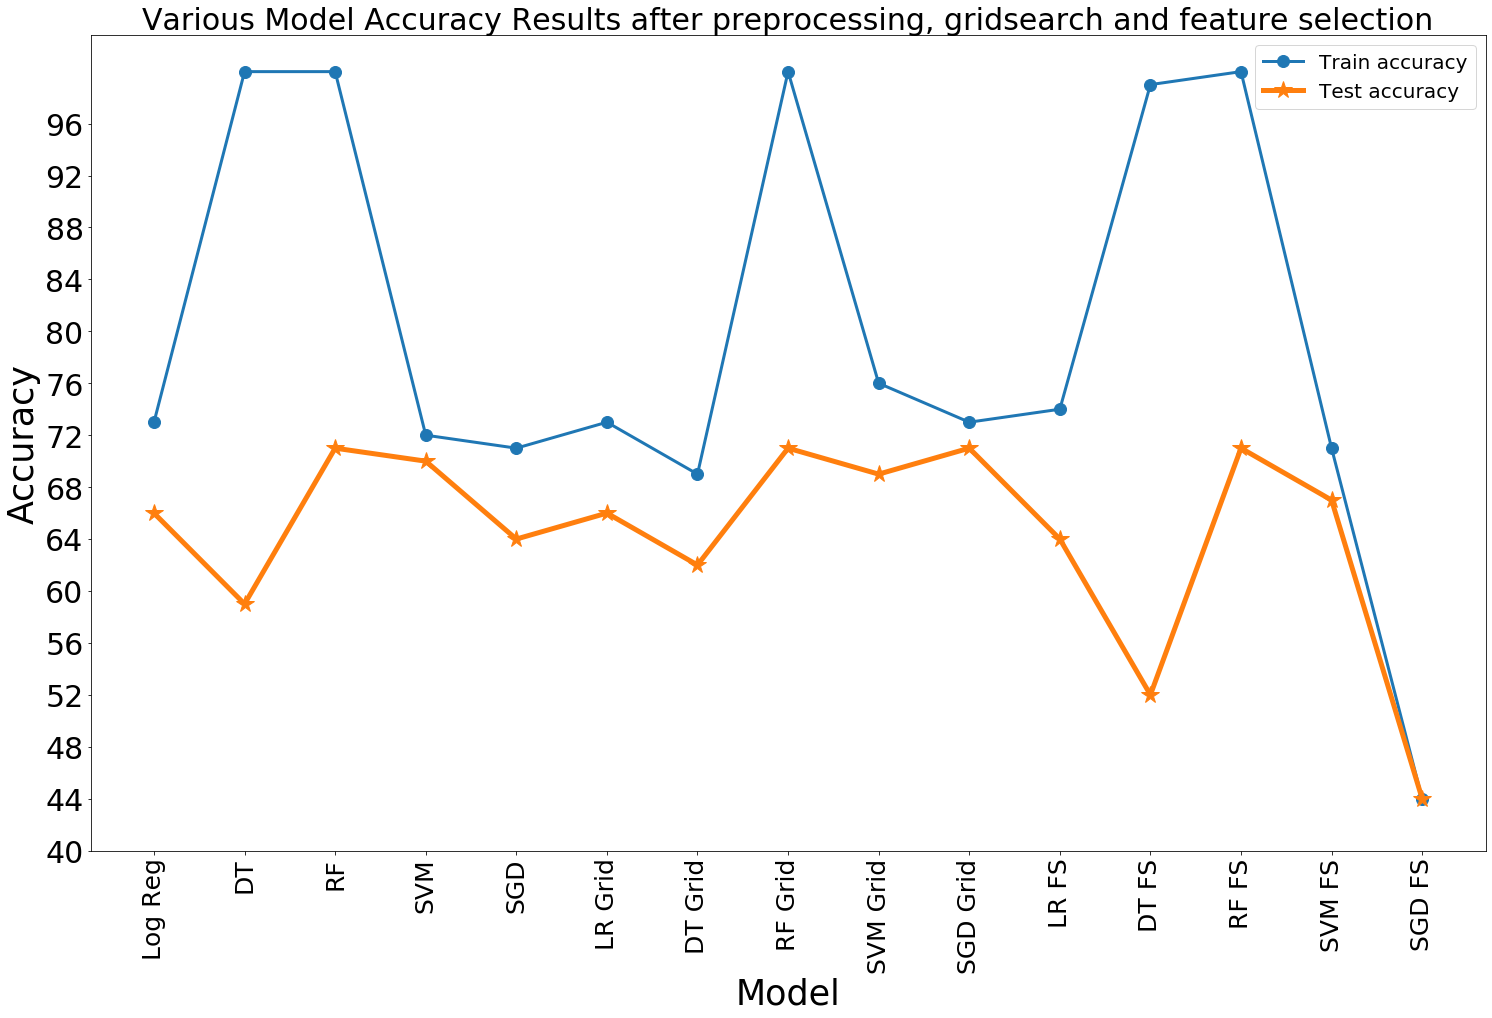

In [147]:
df_acc= pd.DataFrame()
df_acc['Algorithm'] = ['on preprocessed data', 'on preprocessed data','on preprocessed data','on preprocessed data','on preprocessed data',
                   'after Gridsearch','after Gridsearch', 'after Gridsearch','after Gridsearch','after Gridsearch',
                   'after Gridsearch RFE', 'after Gridsearch RFE', 'after Gridsearch RFE','after Gridsearch RFE','after Gridsearch RFE']
    
df_acc['Model']=['Log Reg', 'DT', 'RF', 'SVM','SGD',
                     'LR Grid','DT Grid', 'RF Grid', 'SVM Grid','SGD Grid',
                     'LR FS','DT FS', 'RF FS', 'SVM FS','SGD FS']

df_acc['Acc_train']=[73, 100, 100,72,71,
                 73,69,100,76,73,
                 74,99,100,71,44]

df_acc['Acc_test']=[66, 59, 71,70,64,
                66,62,71,69,71,
                64,52,71,67,44]

fig = plt.subplots(figsize=(25,15))
fig= plt.plot(df_acc['Model'].tolist(), df_acc['Acc_train'].tolist(), label = 'Train accuracy', marker='o',markersize=12, linewidth=3)
fig = plt.plot(df_acc['Model'].tolist(), df_acc['Acc_test'].tolist(),  label = 'Test accuracy', marker='*',markersize=18, linewidth=5)

plt.xlabel('Model',fontsize=35)
plt.ylabel('Accuracy',fontsize=35)
plt.legend(loc='best',fontsize=20)
plt.xticks(rotation = 90,fontsize=25)
plt.yticks(np.arange(40, 100, step=4),fontsize=30)
plt.title('Various Model Accuracy Results after preprocessing, gridsearch and feature selection',fontsize=30)
plt.show()

In [148]:
#accuracy results for train and test
df_acc

,Algorithm,Model,Acc_train,Acc_test
0,on preprocessed data,Log Reg,73,66
1,on preprocessed data,DT,100,59
2,on preprocessed data,RF,100,71
3,on preprocessed data,SVM,72,70
4,on preprocessed data,SGD,71,64
5,after Gridsearch,LR Grid,73,66
6,after Gridsearch,DT Grid,69,62
7,after Gridsearch,RF Grid,100,71
8,after Gridsearch,SVM Grid,76,69
9,after Gridsearch,SGD Grid,73,71
